## Imports

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

/tmp/ipykernel_23565/4264335013.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Read Data

#### Column descriptions at https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [3]:
df = pd.read_csv('data.csv', sep=';')

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
for i in range(len(df.columns)):
    print('Column ' + str(i) + ': ' + df.columns[i])

Column 0: Marital status
Column 1: Application mode
Column 2: Application order
Column 3: Course
Column 4: Daytime/evening attendance	
Column 5: Previous qualification
Column 6: Previous qualification (grade)
Column 7: Nacionality
Column 8: Mother's qualification
Column 9: Father's qualification
Column 10: Mother's occupation
Column 11: Father's occupation
Column 12: Admission grade
Column 13: Displaced
Column 14: Educational special needs
Column 15: Debtor
Column 16: Tuition fees up to date
Column 17: Gender
Column 18: Scholarship holder
Column 19: Age at enrollment
Column 20: International
Column 21: Curricular units 1st sem (credited)
Column 22: Curricular units 1st sem (enrolled)
Column 23: Curricular units 1st sem (evaluations)
Column 24: Curricular units 1st sem (approved)
Column 25: Curricular units 1st sem (grade)
Column 26: Curricular units 1st sem (without evaluations)
Column 27: Curricular units 2nd sem (credited)
Column 28: Curricular units 2nd sem (enrolled)
Column 29: Cur

## Cleaning

In [6]:
# find null values
df.isnull().sum().sum()
# no nulls found; the dataset's creators did all necessary cleaning

0

Dataset creators' comment on cleaning: 'We performed a rigorous data preprocessing to handle data from anomalies, unexplainable outliers, and missing values.'

## Preprocessing

## Exploratory Data Analysis

#### Columns 1 -> 18; run prior to preprocessing

In [7]:
# color dictionary
colors = {'Graduate': 'darkgreen', 'Enrolled': 'darkblue', 'Dropout': 'darkred'}

In [8]:
# print #uniqe values per column
for i in range(16):
    print('Columns #' + str(i) + '; ' + df.columns[i] + ' has ' + str(len(df[df.columns[i]].unique())) + ' unique values')

Columns #0; Marital status has 6 unique values
Columns #1; Application mode has 18 unique values
Columns #2; Application order has 8 unique values
Columns #3; Course has 17 unique values
Columns #4; Daytime/evening attendance	 has 2 unique values
Columns #5; Previous qualification has 17 unique values
Columns #6; Previous qualification (grade) has 101 unique values
Columns #7; Nacionality has 21 unique values
Columns #8; Mother's qualification has 29 unique values
Columns #9; Father's qualification has 34 unique values
Columns #10; Mother's occupation has 32 unique values
Columns #11; Father's occupation has 46 unique values
Columns #12; Admission grade has 620 unique values
Columns #13; Displaced has 2 unique values
Columns #14; Educational special needs has 2 unique values
Columns #15; Debtor has 2 unique values


In [9]:
# categorical columns are num 0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14; use bar charts
# continuous columns are num 6, 12; use histogram

### Column 0: Marital Status

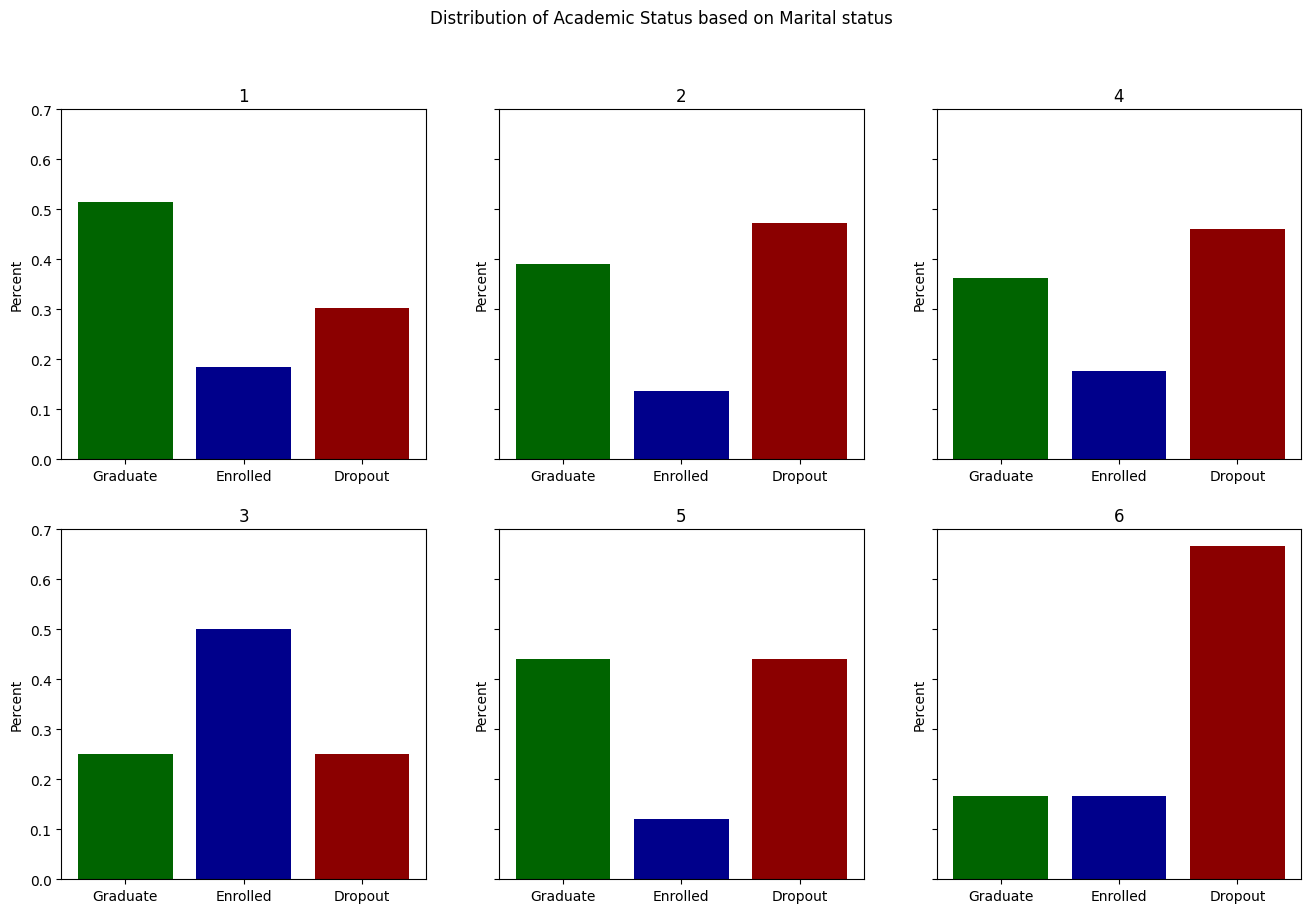

In [10]:
# select subset of dataset
col = df.columns[0]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 3
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 10), sharey=True)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: significantly less graduates in status 6, significantly more enrolled in status 3**

Likely an influential feature

### Column 1: Application Mode

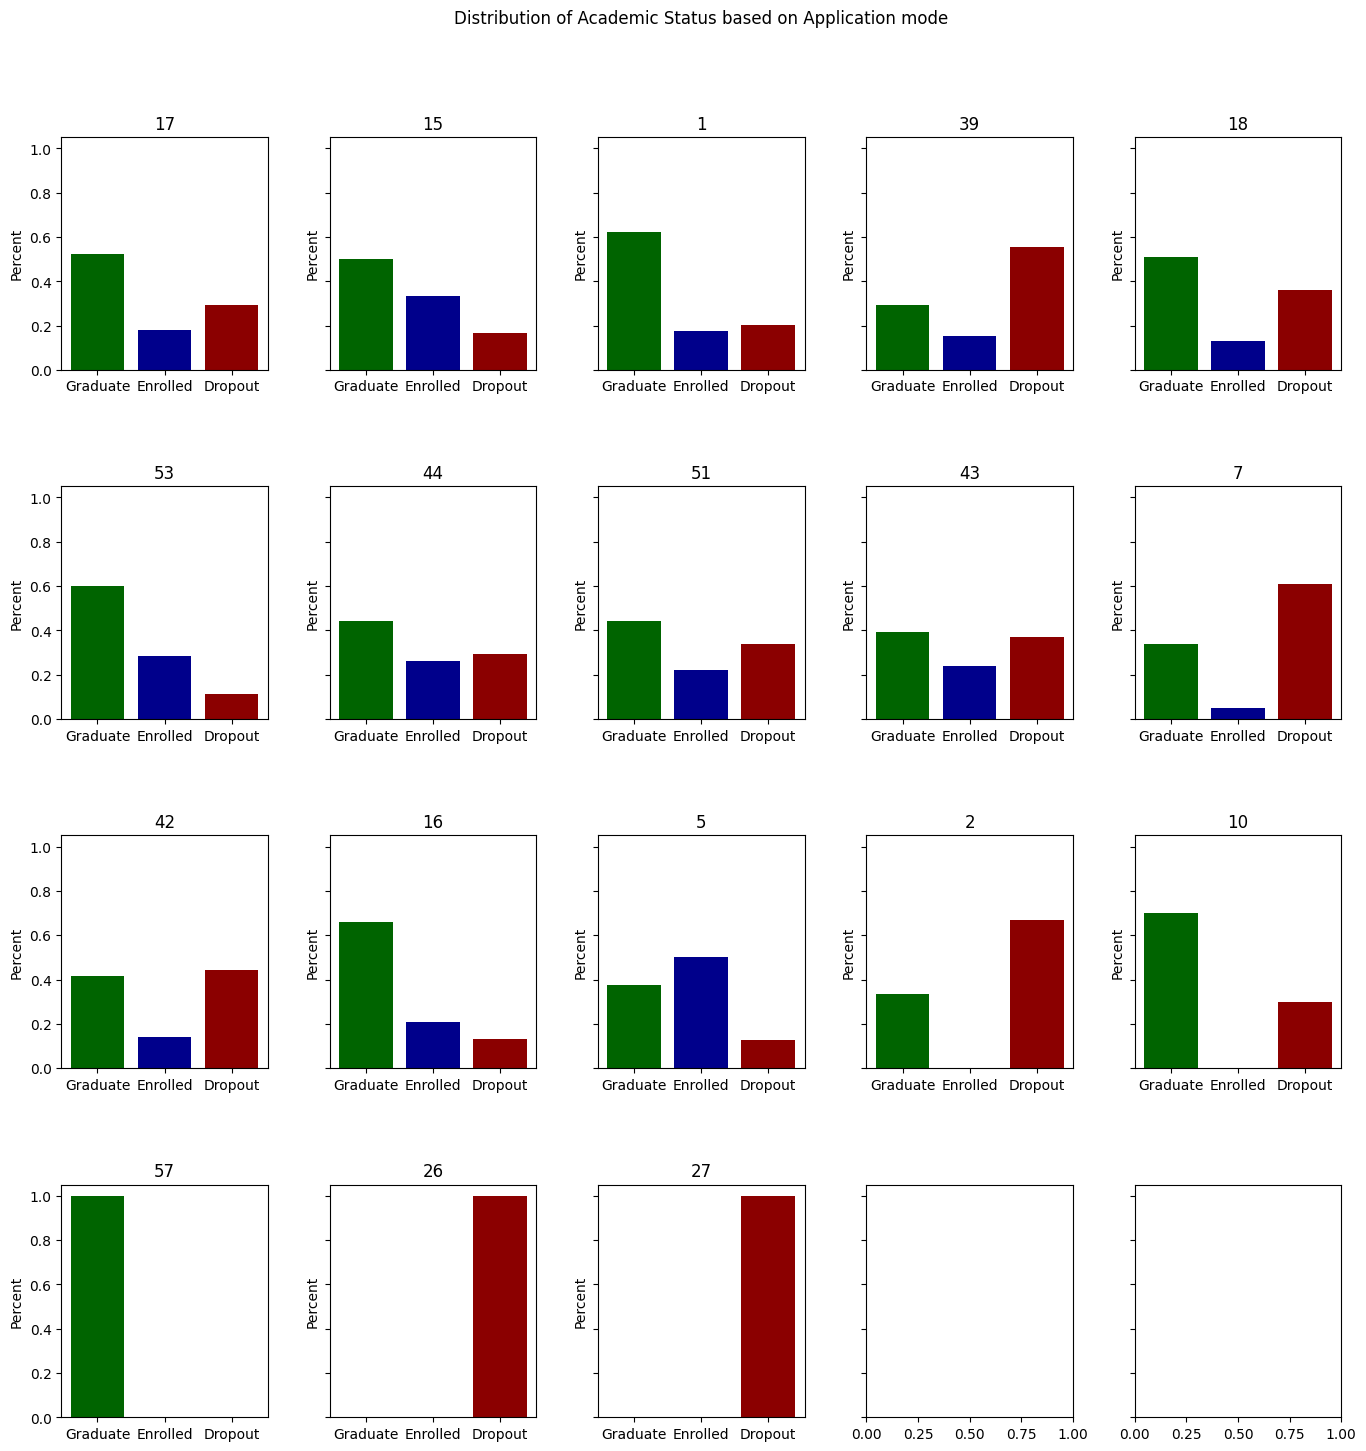

In [11]:
# select subset of dataset
col = df.columns[1]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 4
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant fluctuations within this feature**

Likely an influential feature

### Column 2: Application Order

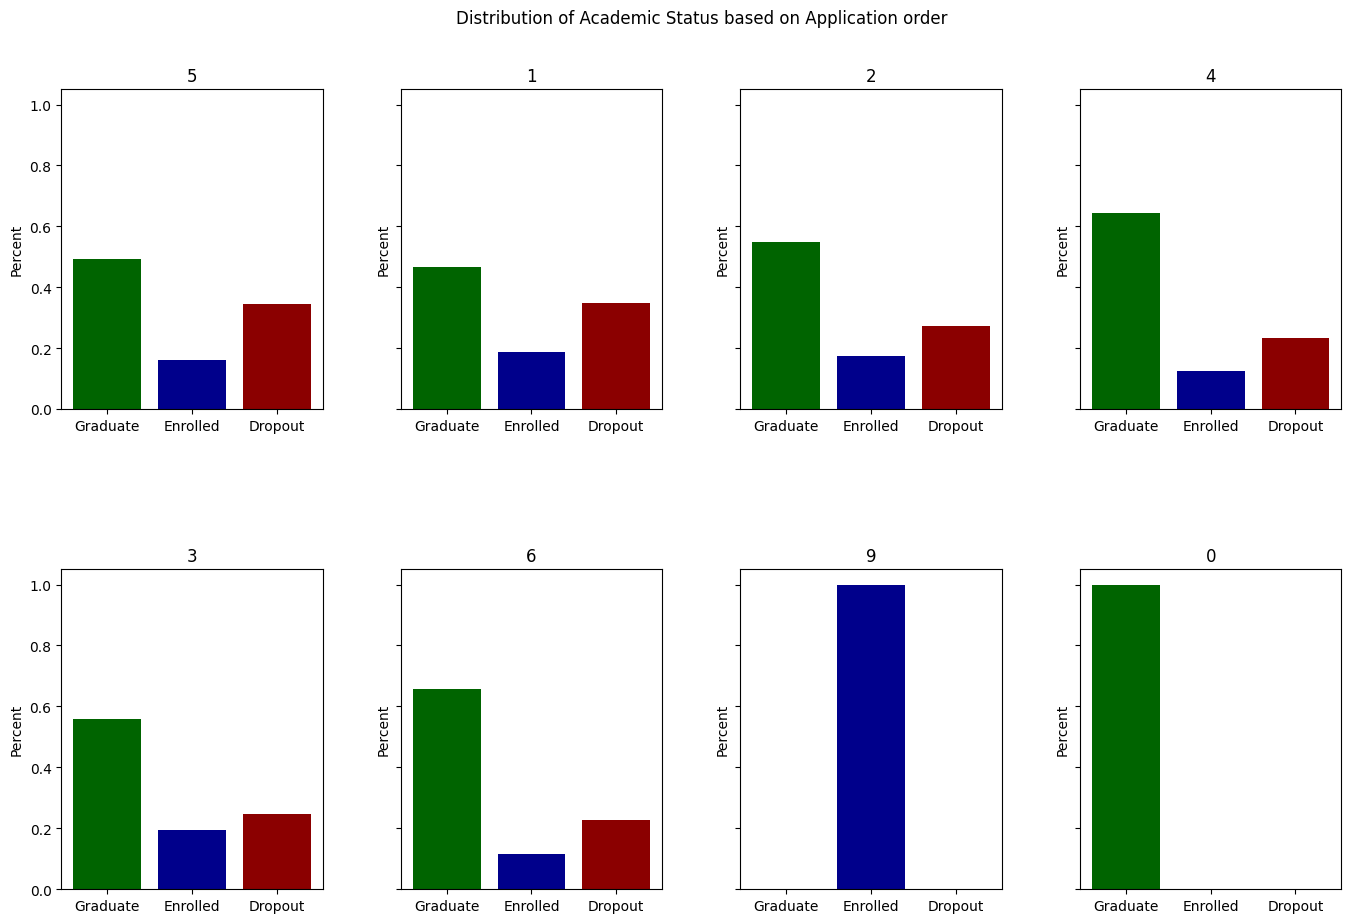

In [12]:
# select subset of dataset
col = df.columns[2]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 10), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Not much fluctuation within this feature**

Probably not an influential feature

### Column 3: Course

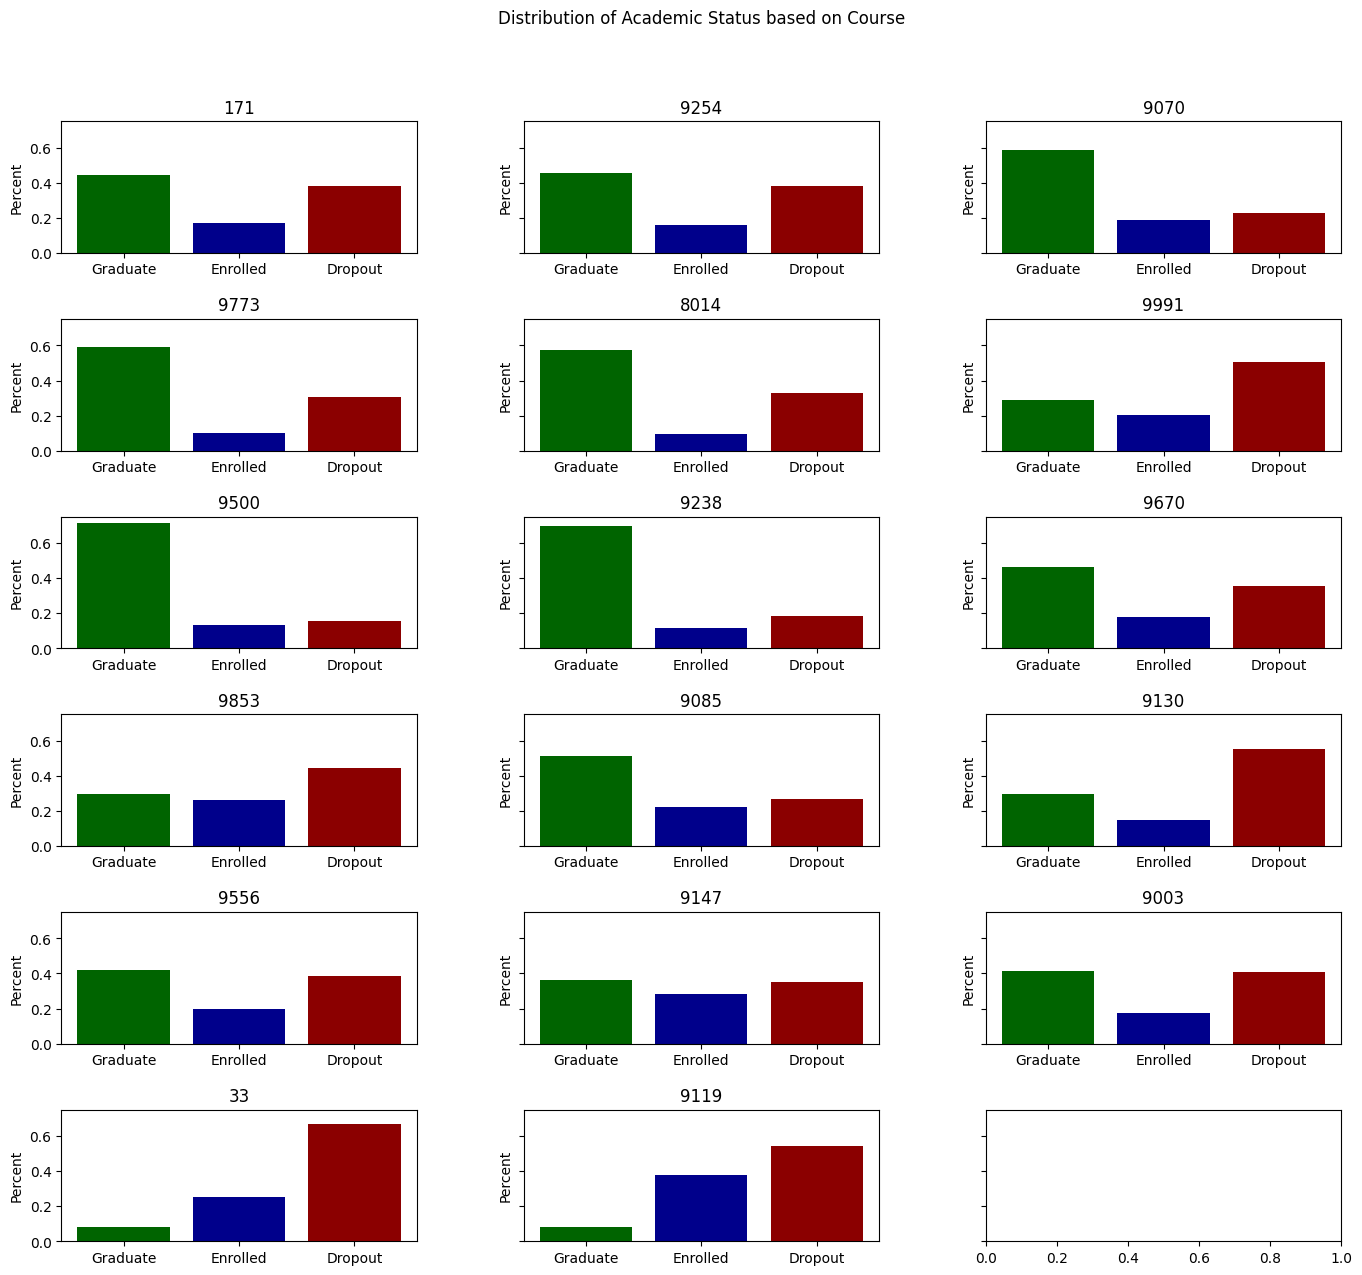

In [13]:
# select subset of dataset
col = df.columns[3]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 3
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 14), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant difference within some feature types**

Likely an influential feature

### Column 4: Daytime/Evening attendance

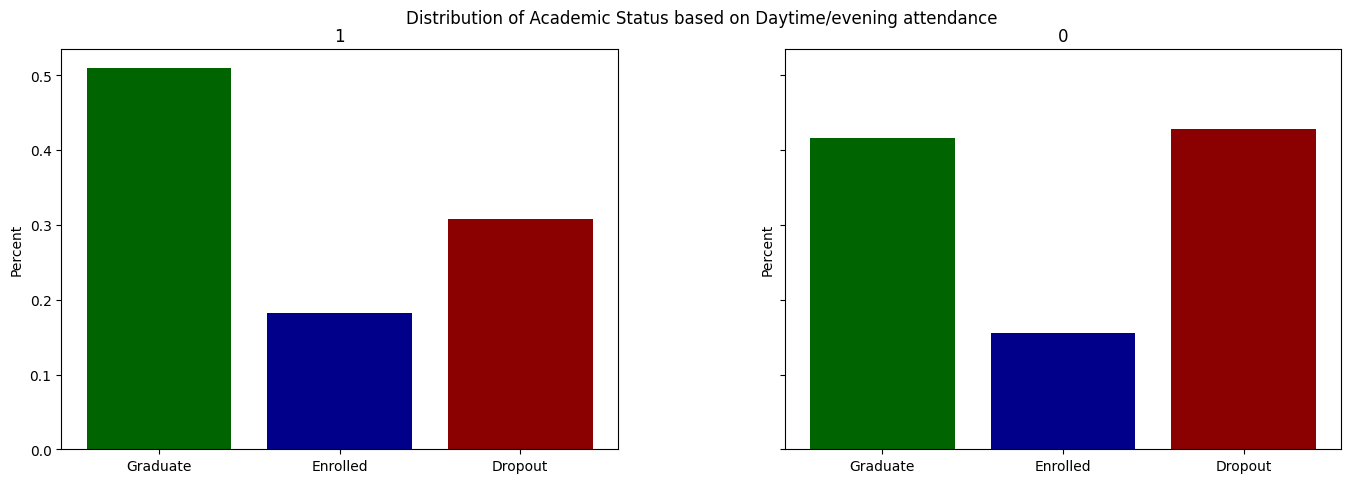

In [14]:
# select subset of dataset
col = df.columns[4]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col[:-1])
plt.show()

**Observation: Not much fluctuation within this feature**

Probably not an influential feature

### Column 5: Previous Qualification

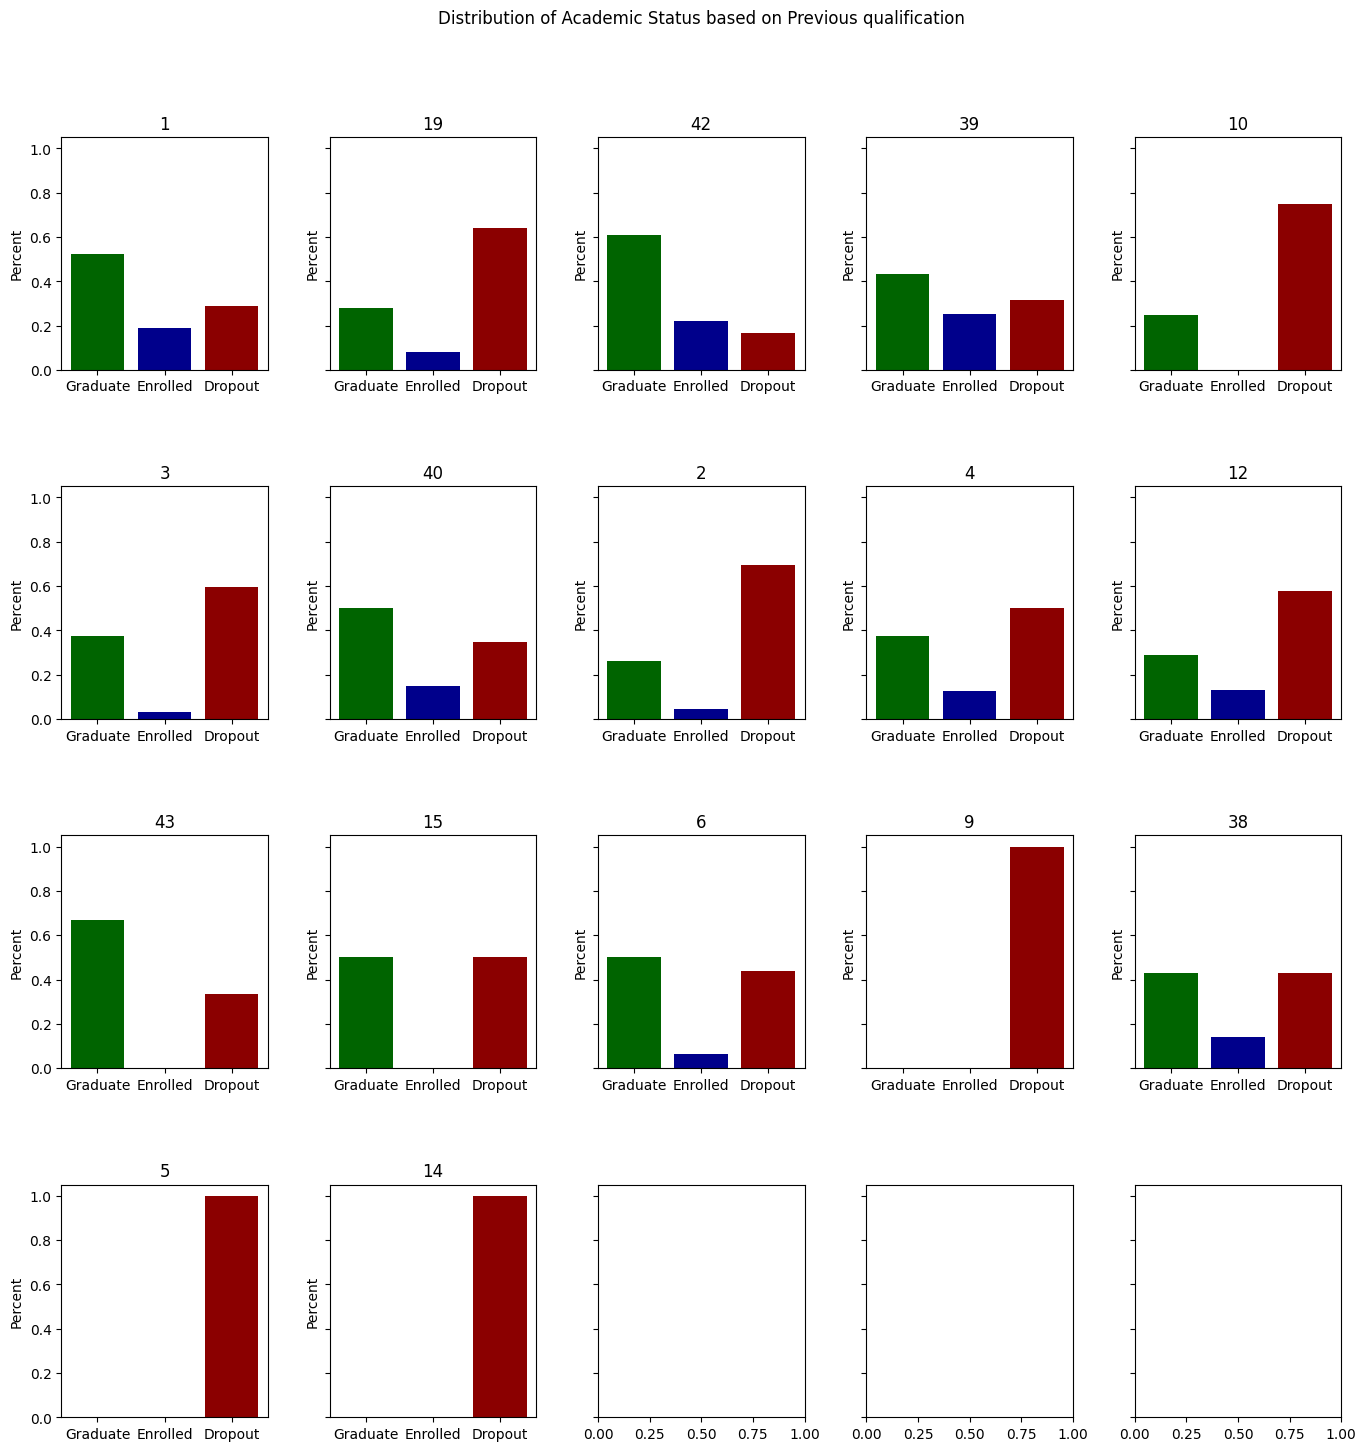

In [15]:
# select subset of dataset
col = df.columns[5]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 4
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant fluctuation within this feature**

Probably an influential feature

### Column 6: Previous Qualification (grade)

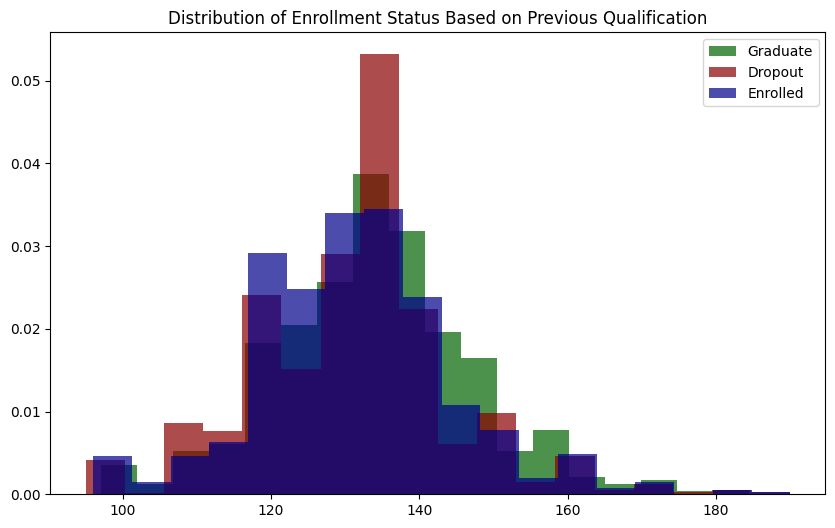

In [16]:
col = df.columns[6]

plt.figure(figsize=(10,6))
feature_ser = df[col]
for target_val in ['Graduate', 'Dropout', 'Enrolled']:
    plt.hist(feature_ser[df['Target'] == target_val], color=colors[target_val], alpha=.7, bins=18, label=target_val, density=True)
plt.title('Distribution of Enrollment Status Based on Previous Qualification')
plt.legend()
plt.show()

**Observation: Not much fluctuation within this feature (distributions are nearly the same)**

Probably not an influential feature

### Column 7: Nationality

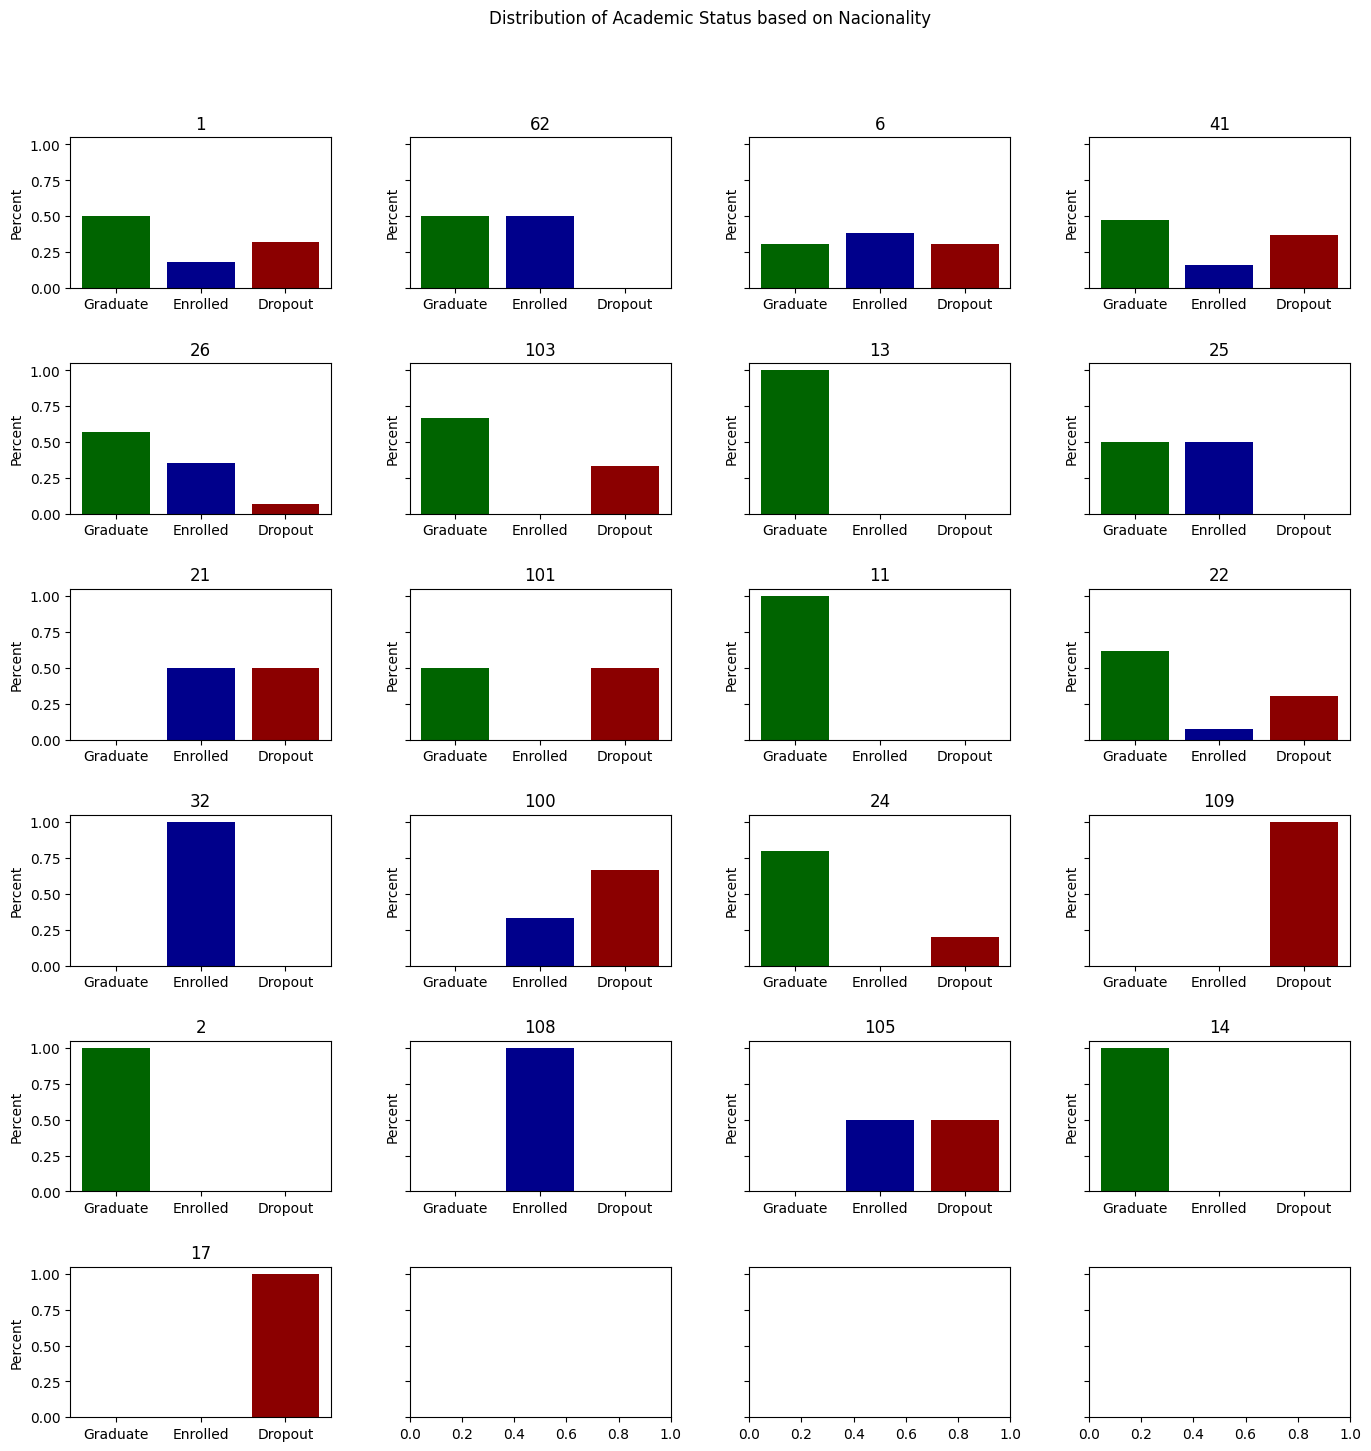

In [17]:
# select subset of dataset
col = df.columns[7]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Significant differences within this feature (but also unequal representation of each type of nationality)**

Maybe an influential feature

### Column 8: Mother's Qualification

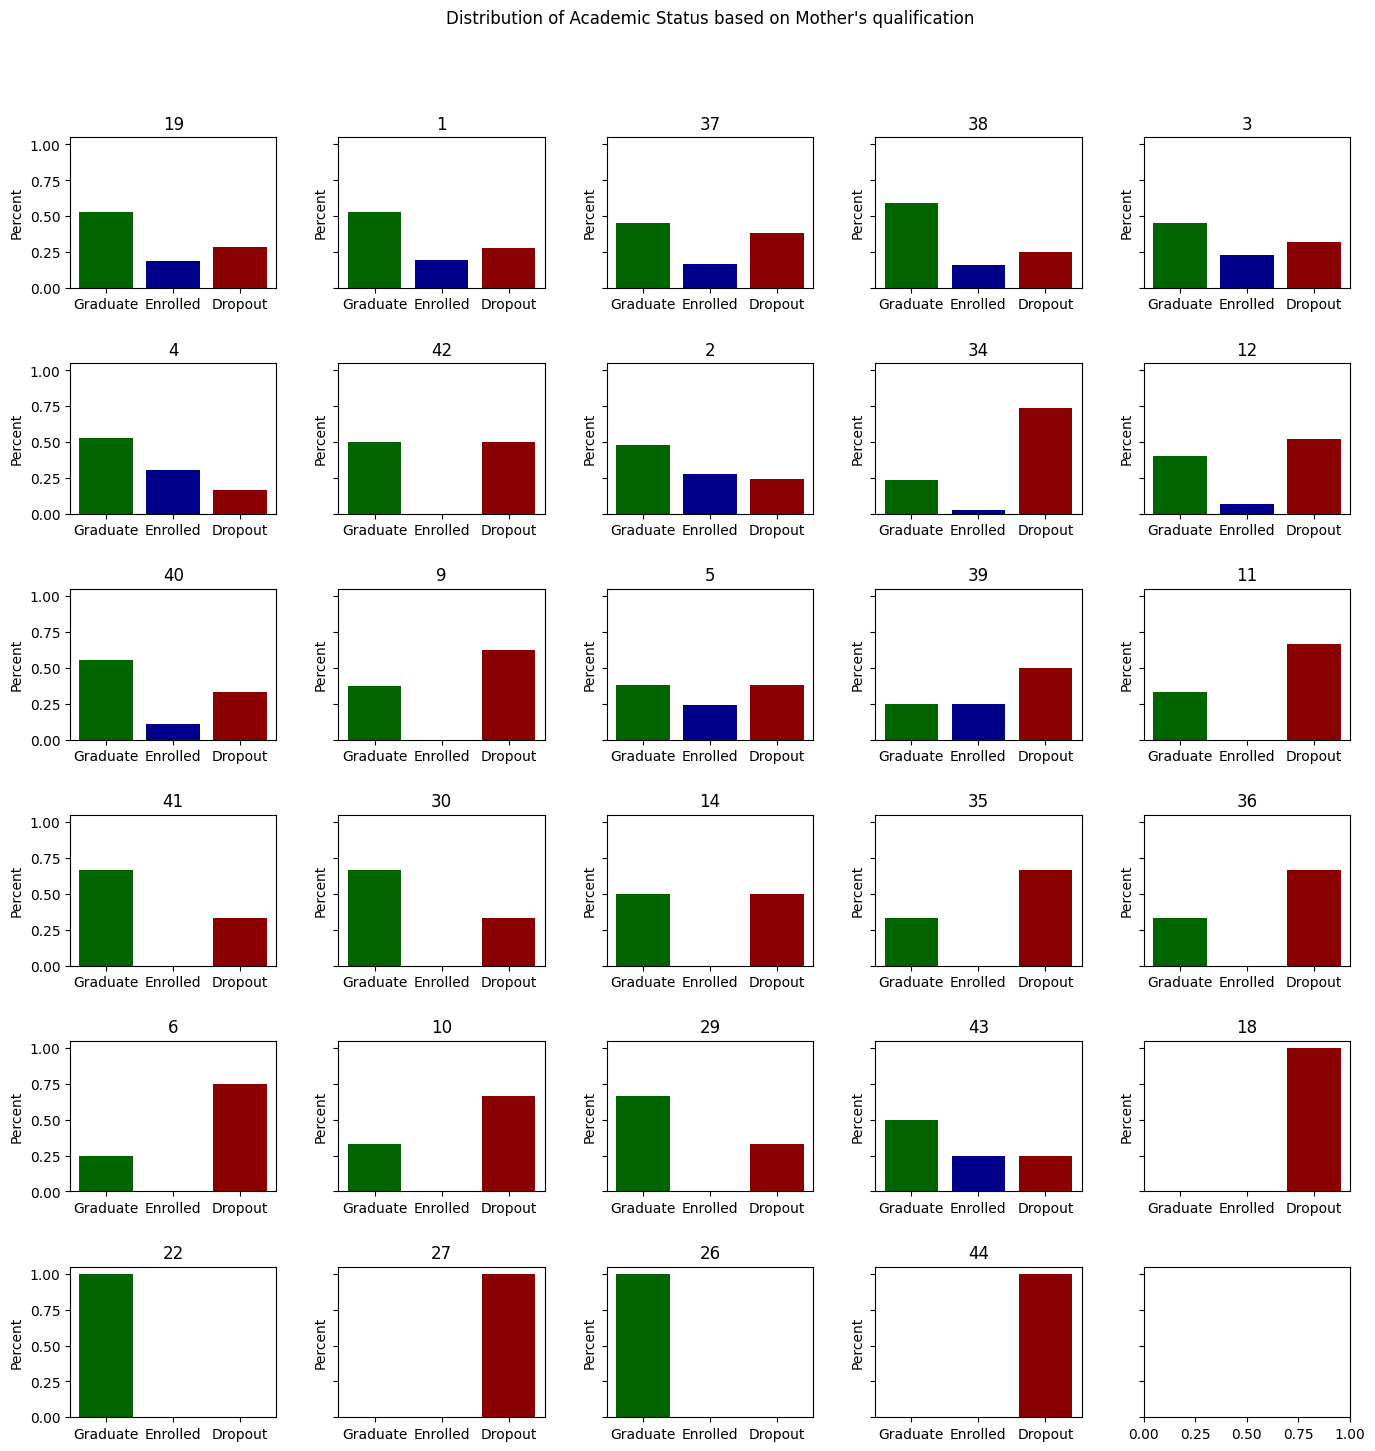

In [18]:
# select subset of dataset
col = df.columns[8]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Generally few fluctuations; large variety draws concern to representation of each type of feature (mother's qualification) within whole dataset**

Probably not an influential feature

### Column 9: Father's Qualification

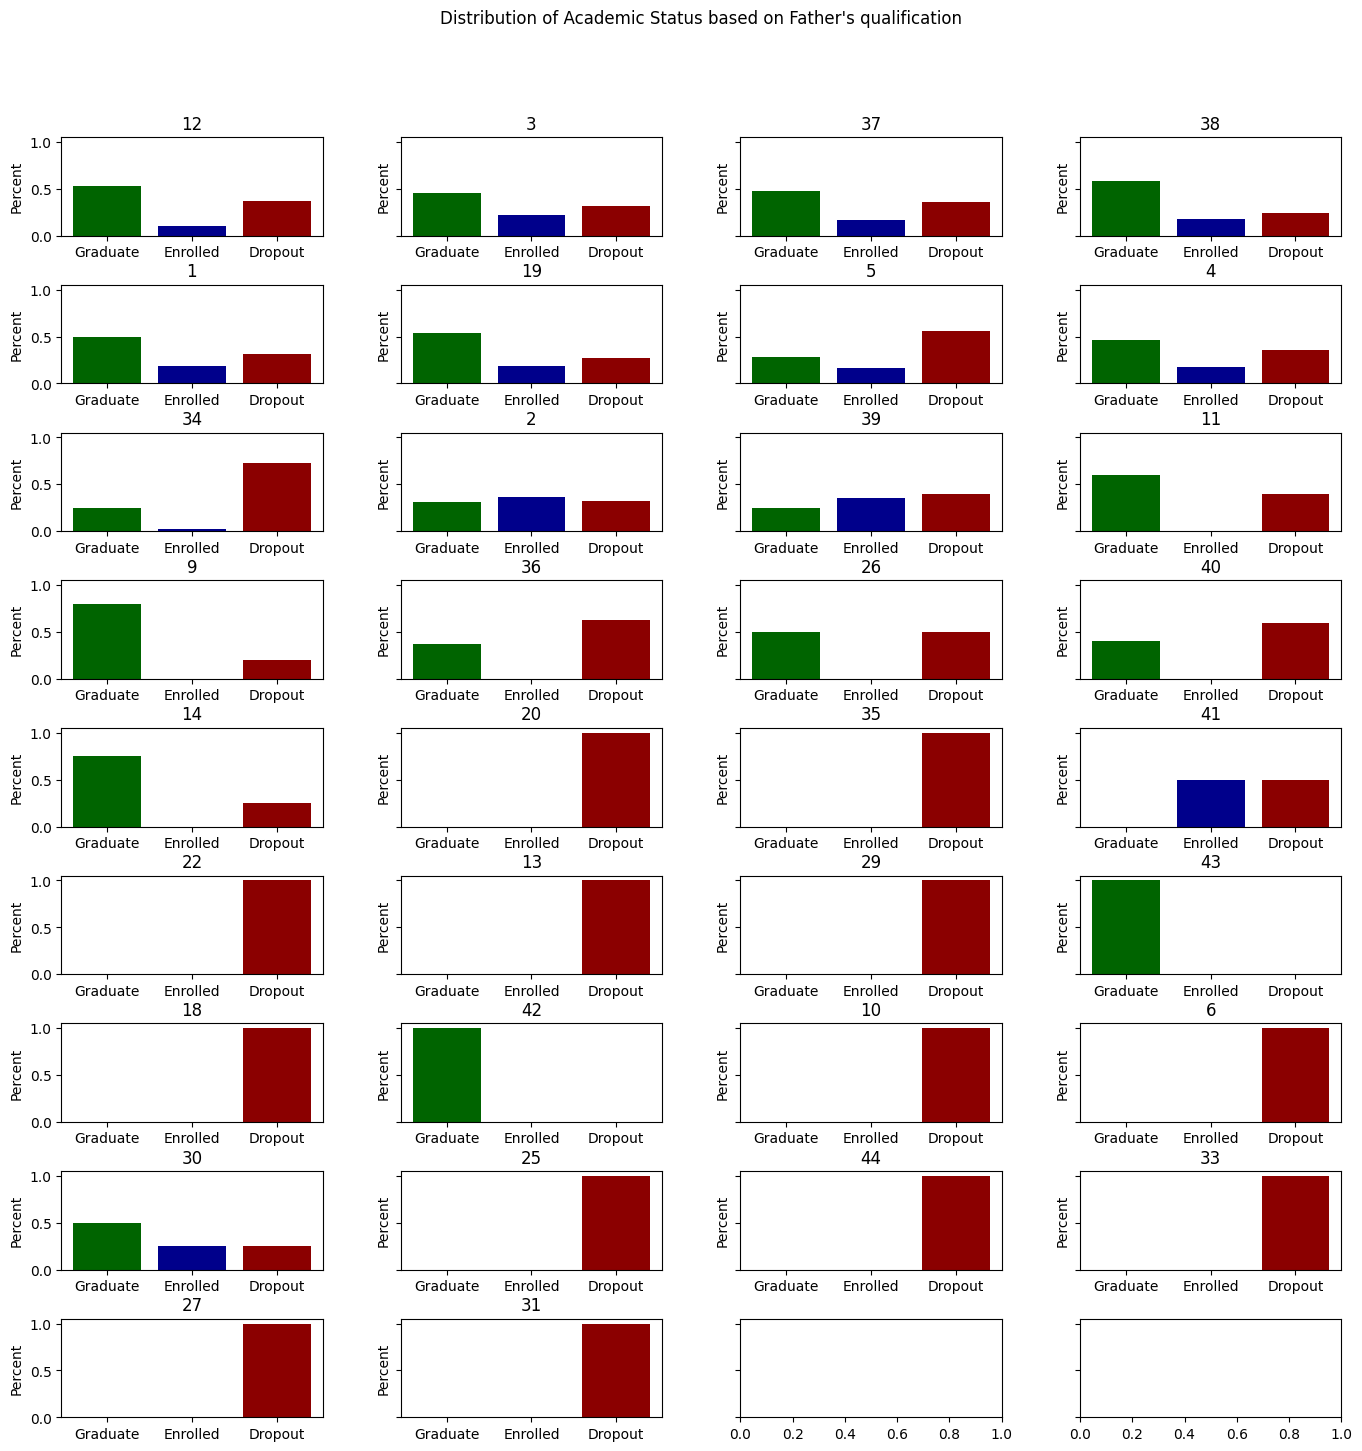

In [19]:
# select subset of dataset
col = df.columns[9]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 9
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Lots of fluctuations; large variety draws concern to representation of each type of feature (father's qualification) within whole dataset. Lots of 100% dropout rates within types of features**

Likely an influential feature

### Column 10: Mother's Occupation

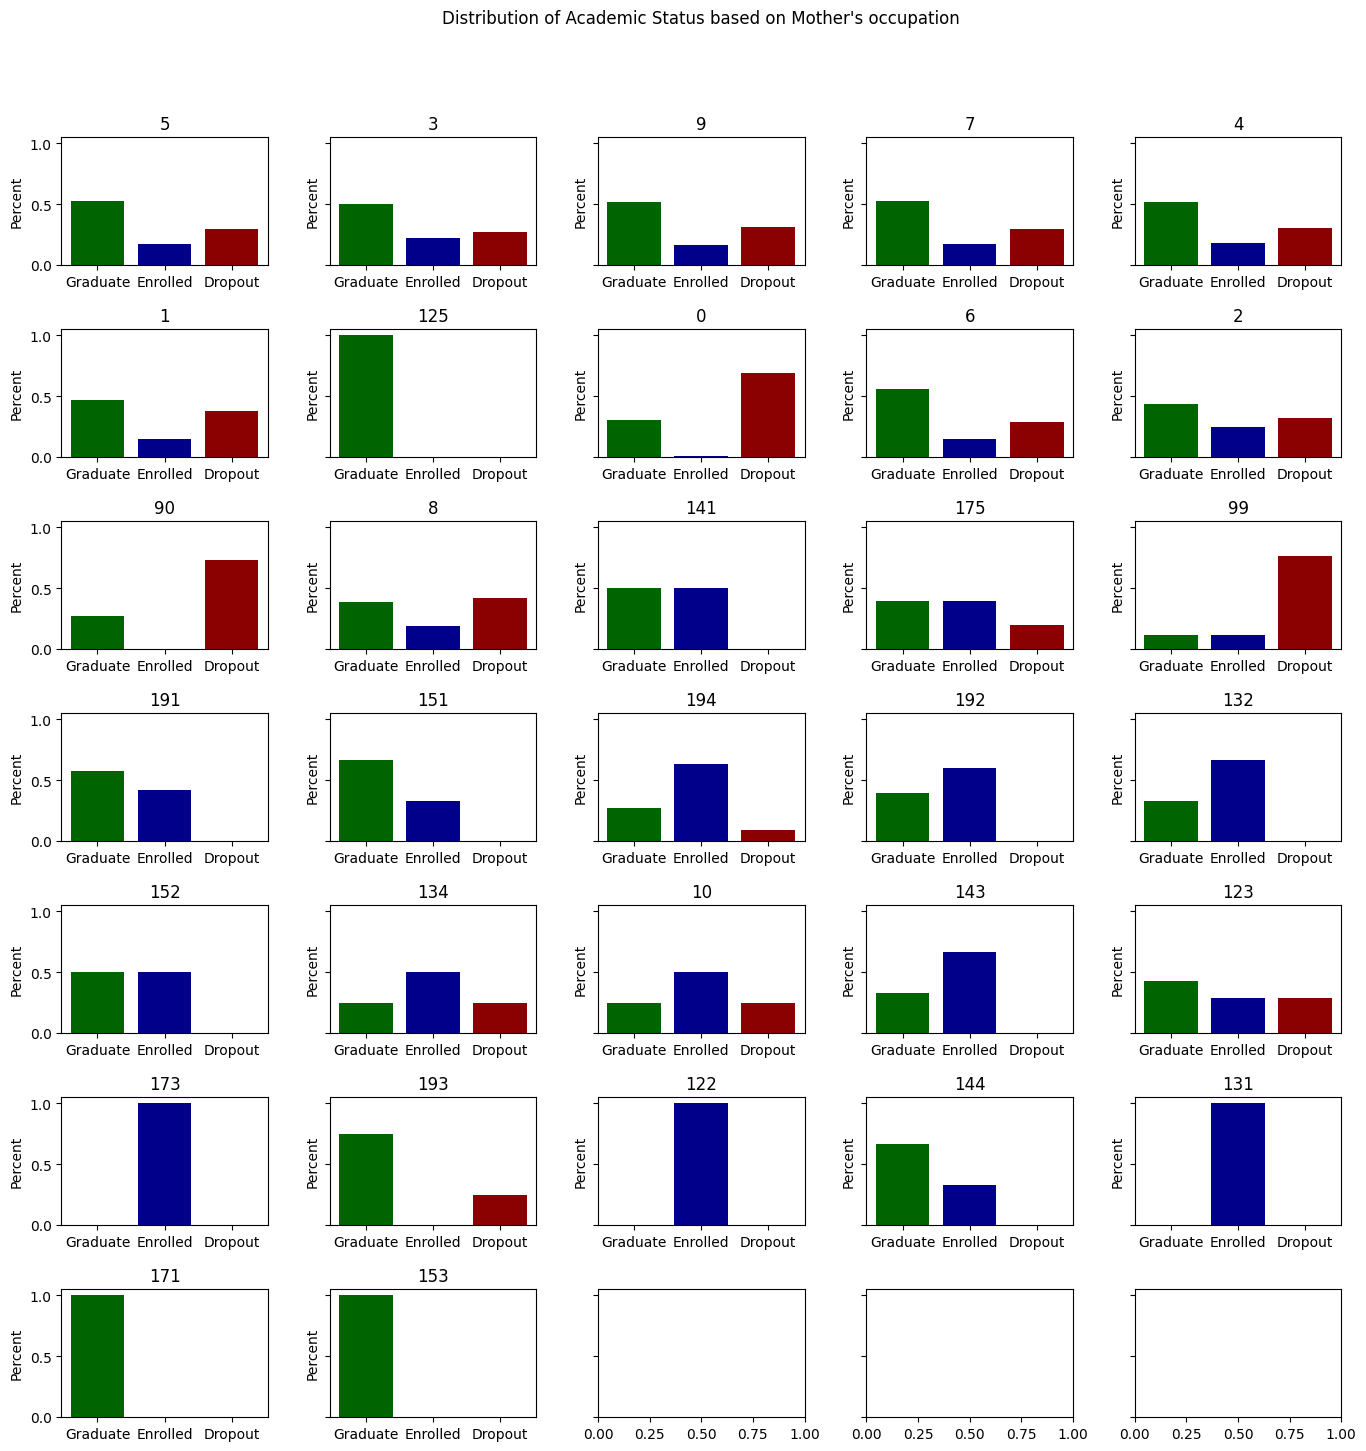

In [20]:
# select subset of dataset
col = df.columns[10]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 7
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Lots of fluctuations; large variety draws concern to representation of each type of feature (mother's occupation) within whole dataset**

Likely an influential feature

### Column 11: Father's Occupation

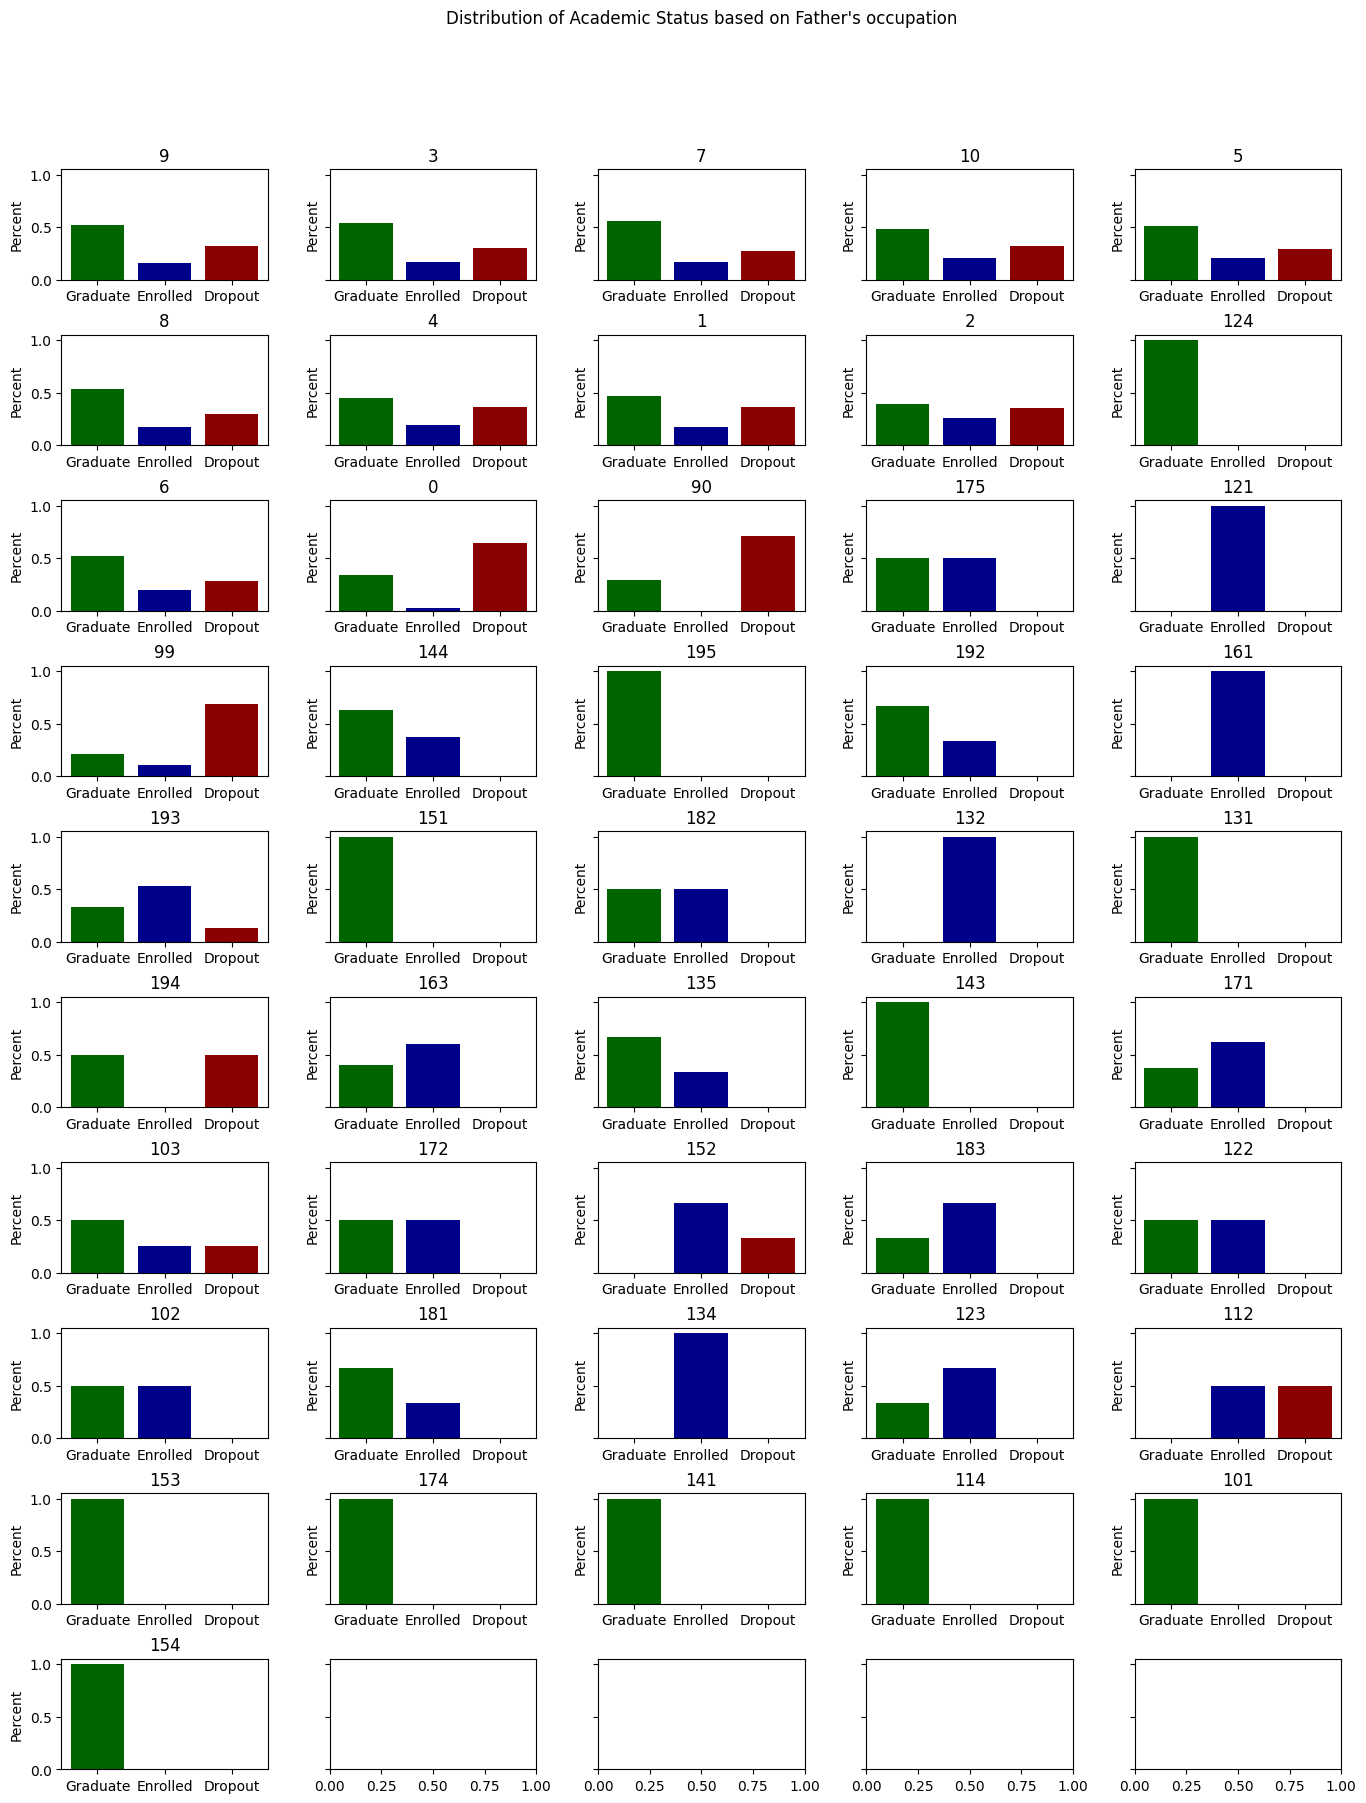

In [21]:
# select subset of dataset
col = df.columns[11]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 10
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 20), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Lots of fluctuations; large variety draws concern to representation of each type of feature (mother's occupation) within whole dataset. Lots of 100% graduation rates based on types of feature.**

Likely an influential feature

### Column 12: Admission Grade

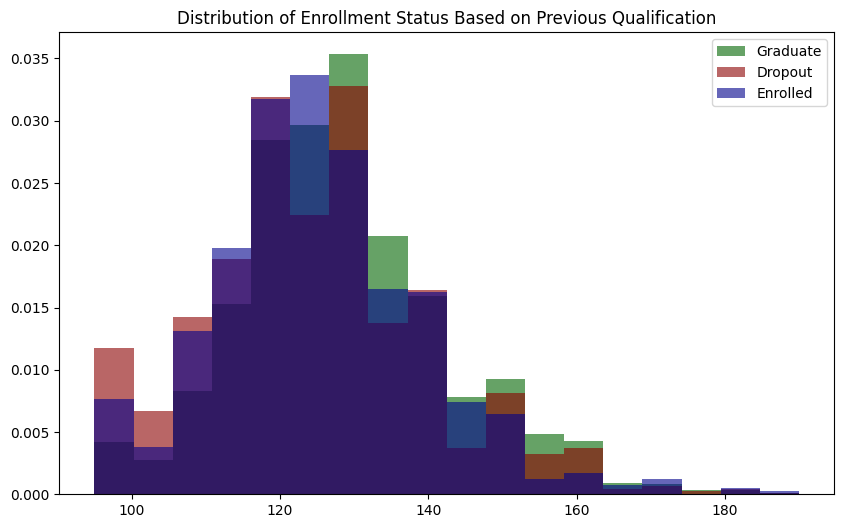

In [22]:
col = df.columns[12]

plt.figure(figsize=(10,6))
feature_ser = df[col]
for target_val in ['Graduate', 'Dropout', 'Enrolled']:
    plt.hist(feature_ser[df['Target'] == target_val], color=colors[target_val], alpha=.6, bins=18, label=target_val, density=True)
plt.title('Distribution of Enrollment Status Based on Previous Qualification')
plt.legend()
plt.show()

**Observation: Very similar distribution within each enrollment status**

Probably not an influential feature

### Column 13: Displaced

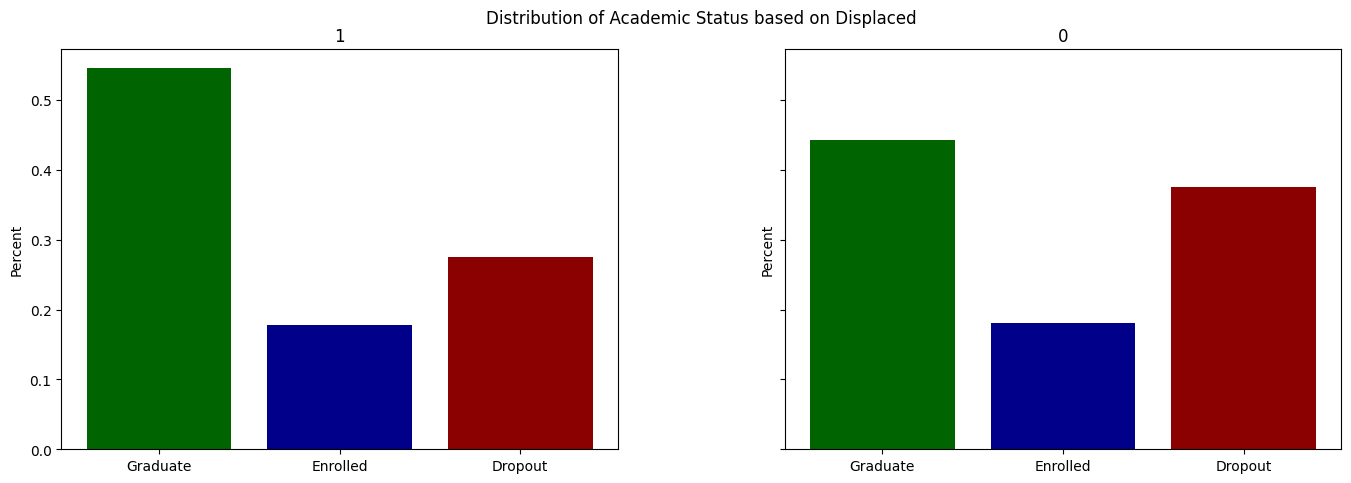

In [23]:
# select subset of dataset
col = df.columns[13]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Very similar distributions**

Probably not an influential feature

### Column 14: Education Special Needs

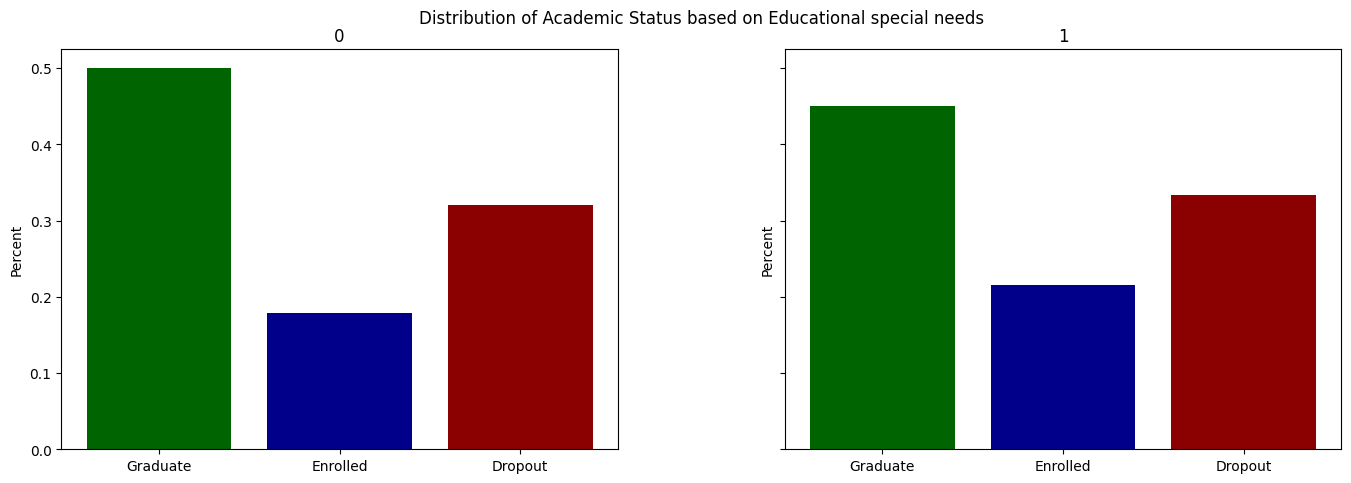

In [24]:
# select subset of dataset
col = df.columns[14]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Very similar distributions.**

Probably not an influential feature

### Column 15: Debtor

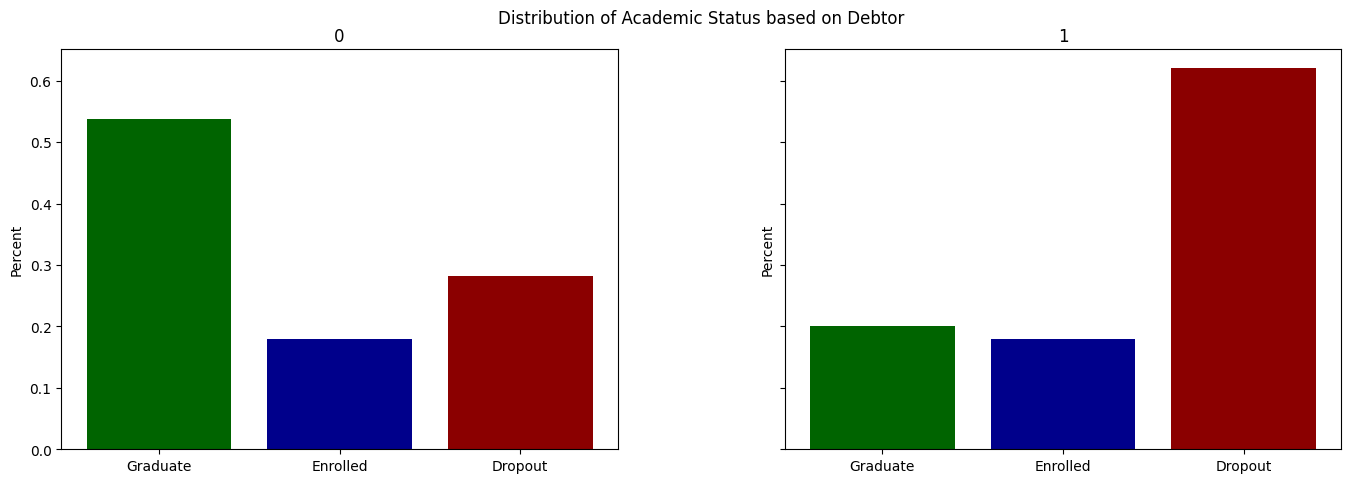

In [25]:
# select subset of dataset
col = df.columns[15]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

**Observation: Very different distributions.**

Very likely to be an influential feature

# Summary on EDA for Columns 0-15:

- Columns #0; Marital status : likely
- Columns #1; Application mode : Likely
- Columns #2; Application order : Unlikely
- Columns #3; Course : Likely
- Columns #4; Daytime/evening attendance : Unlikely
- Columns #5; Previous qualification : Likely
- Columns #6; Previous qualification (grade) : Unlikely
- Columns #7; Nationality : Likely
- Columns #8; Mother's qualification : Unlikely
- Columns #9; Father's qualification : Likely
- Columns #10; Mother's occupation : Likely
- Columns #11; Father's occupation : Likely
- Columns #12; Admission grade : Unlikely
- Columns #13; Displaced : Unlikely
- Columns #14; Educational special needs : Unlikely
- Columns #15; Debtor : Likely


In [72]:
# print #uniqe values per column
for i in range(16,36):
    print('Columns #' + str(i) + '; ' + df.columns[i] + ' has ' + str(len(df[df.columns[i]].unique())) + ' unique values')

Columns #16; Tuition fees up to date has 2 unique values
Columns #17; Gender has 2 unique values
Columns #18; Scholarship holder has 2 unique values
Columns #19; Age at enrollment has 46 unique values
Columns #20; International has 2 unique values
Columns #21; Curricular units 1st sem (credited) has 21 unique values
Columns #22; Curricular units 1st sem (enrolled) has 23 unique values
Columns #23; Curricular units 1st sem (evaluations) has 35 unique values
Columns #24; Curricular units 1st sem (approved) has 23 unique values
Columns #25; Curricular units 1st sem (grade) has 805 unique values
Columns #26; Curricular units 1st sem (without evaluations) has 11 unique values
Columns #27; Curricular units 2nd sem (credited) has 19 unique values
Columns #28; Curricular units 2nd sem (enrolled) has 22 unique values
Columns #29; Curricular units 2nd sem (evaluations) has 30 unique values
Columns #30; Curricular units 2nd sem (approved) has 20 unique values
Columns #31; Curricular units 2nd sem

In [27]:
# categorical columns are num 16,17,18,20,21,22,23,24,26,27,28,29,30,32,33,34,35; use bar charts
# continuous columns are num 19,25,31; use histogram

### Column 16: Tuition fees up to date

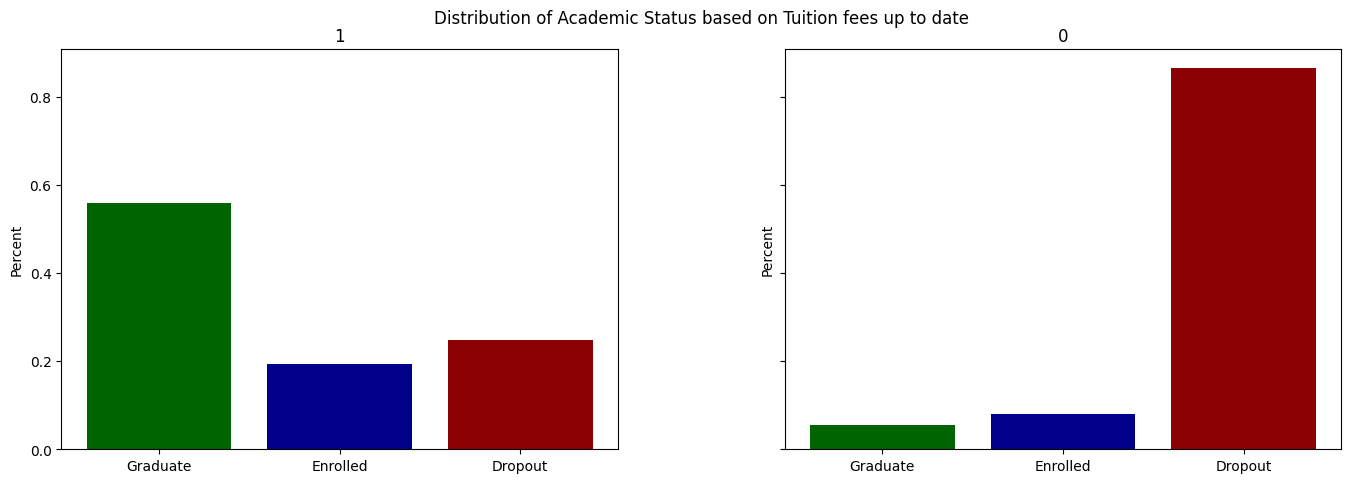

In [28]:
# select subset of dataset
col = df.columns[16]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 17; Gender

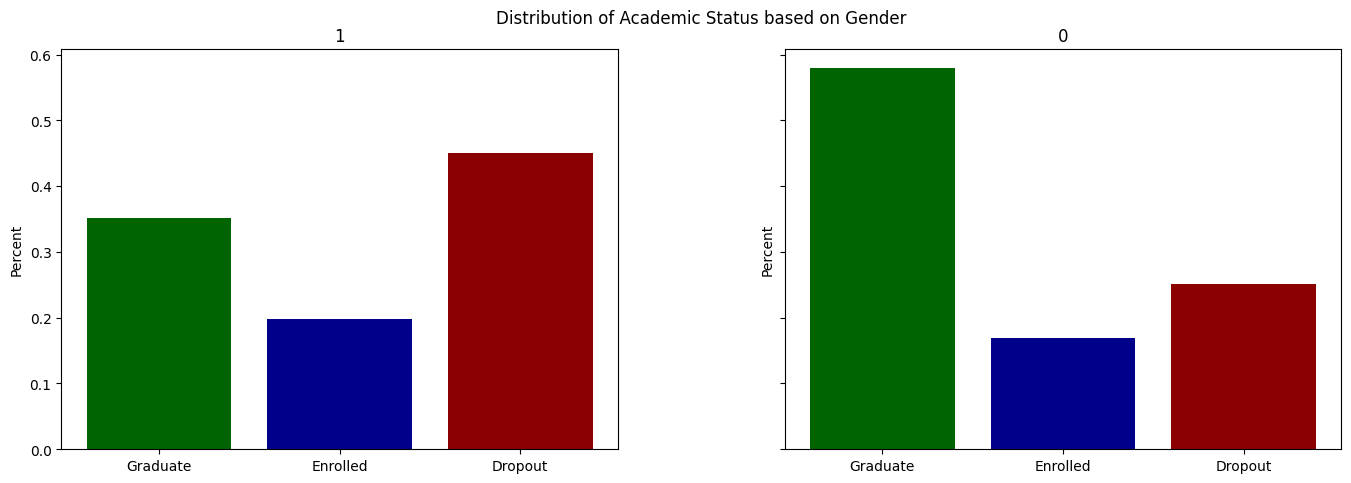

In [29]:
# select subset of dataset
col = df.columns[17]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 18: Scholarship holder

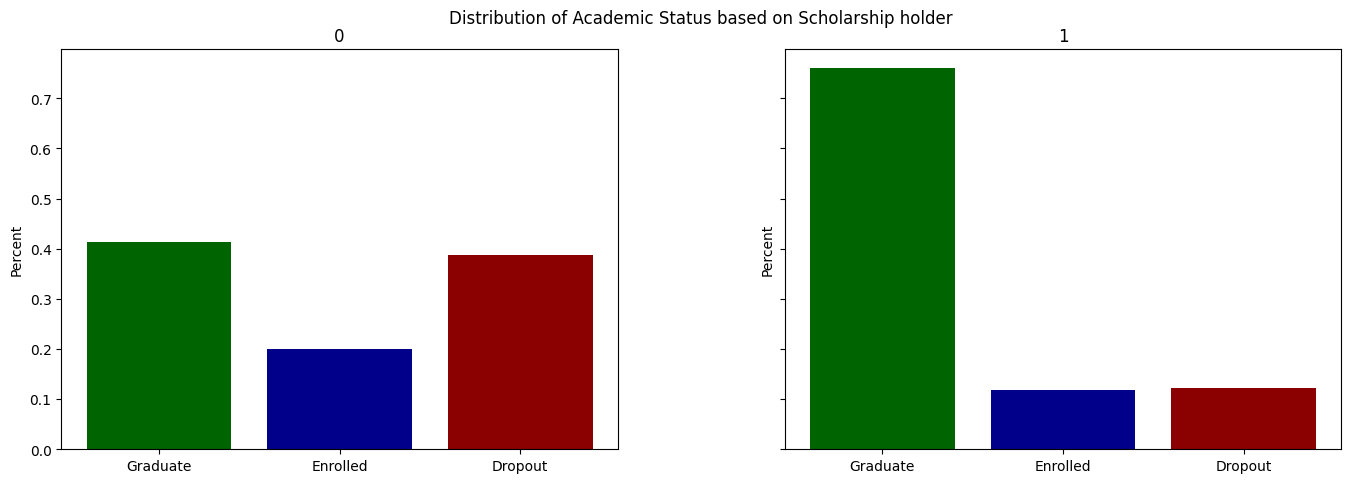

In [30]:
# select subset of dataset
col = df.columns[18]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 19: Age at enrollment

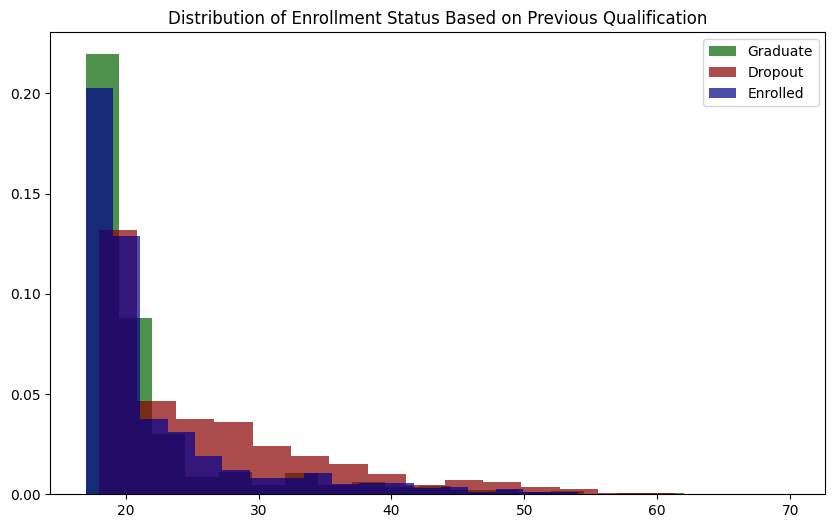

In [31]:
col = df.columns[19]

plt.figure(figsize=(10,6))
feature_ser = df[col]
for target_val in ['Graduate', 'Dropout', 'Enrolled']:
    plt.hist(feature_ser[df['Target'] == target_val], color=colors[target_val], alpha=.7, bins=18, label=target_val, density=True)
plt.title('Distribution of Enrollment Status Based on Previous Qualification')
plt.legend()
plt.show()

### Columns 20: International

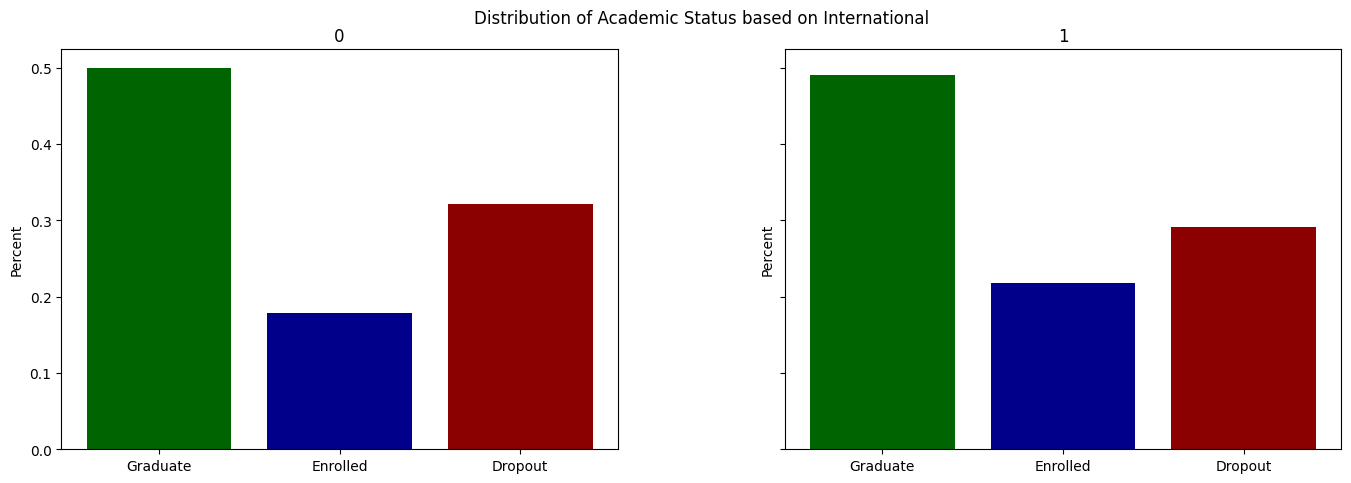

In [35]:
# select subset of dataset
col = df.columns[20]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 1
subplots_width = 2
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 5), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[i].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[i].set_title(feature_vals[i])
    # set y-axis title
    axs[i].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 21: Curricular units 1st sem (credited)

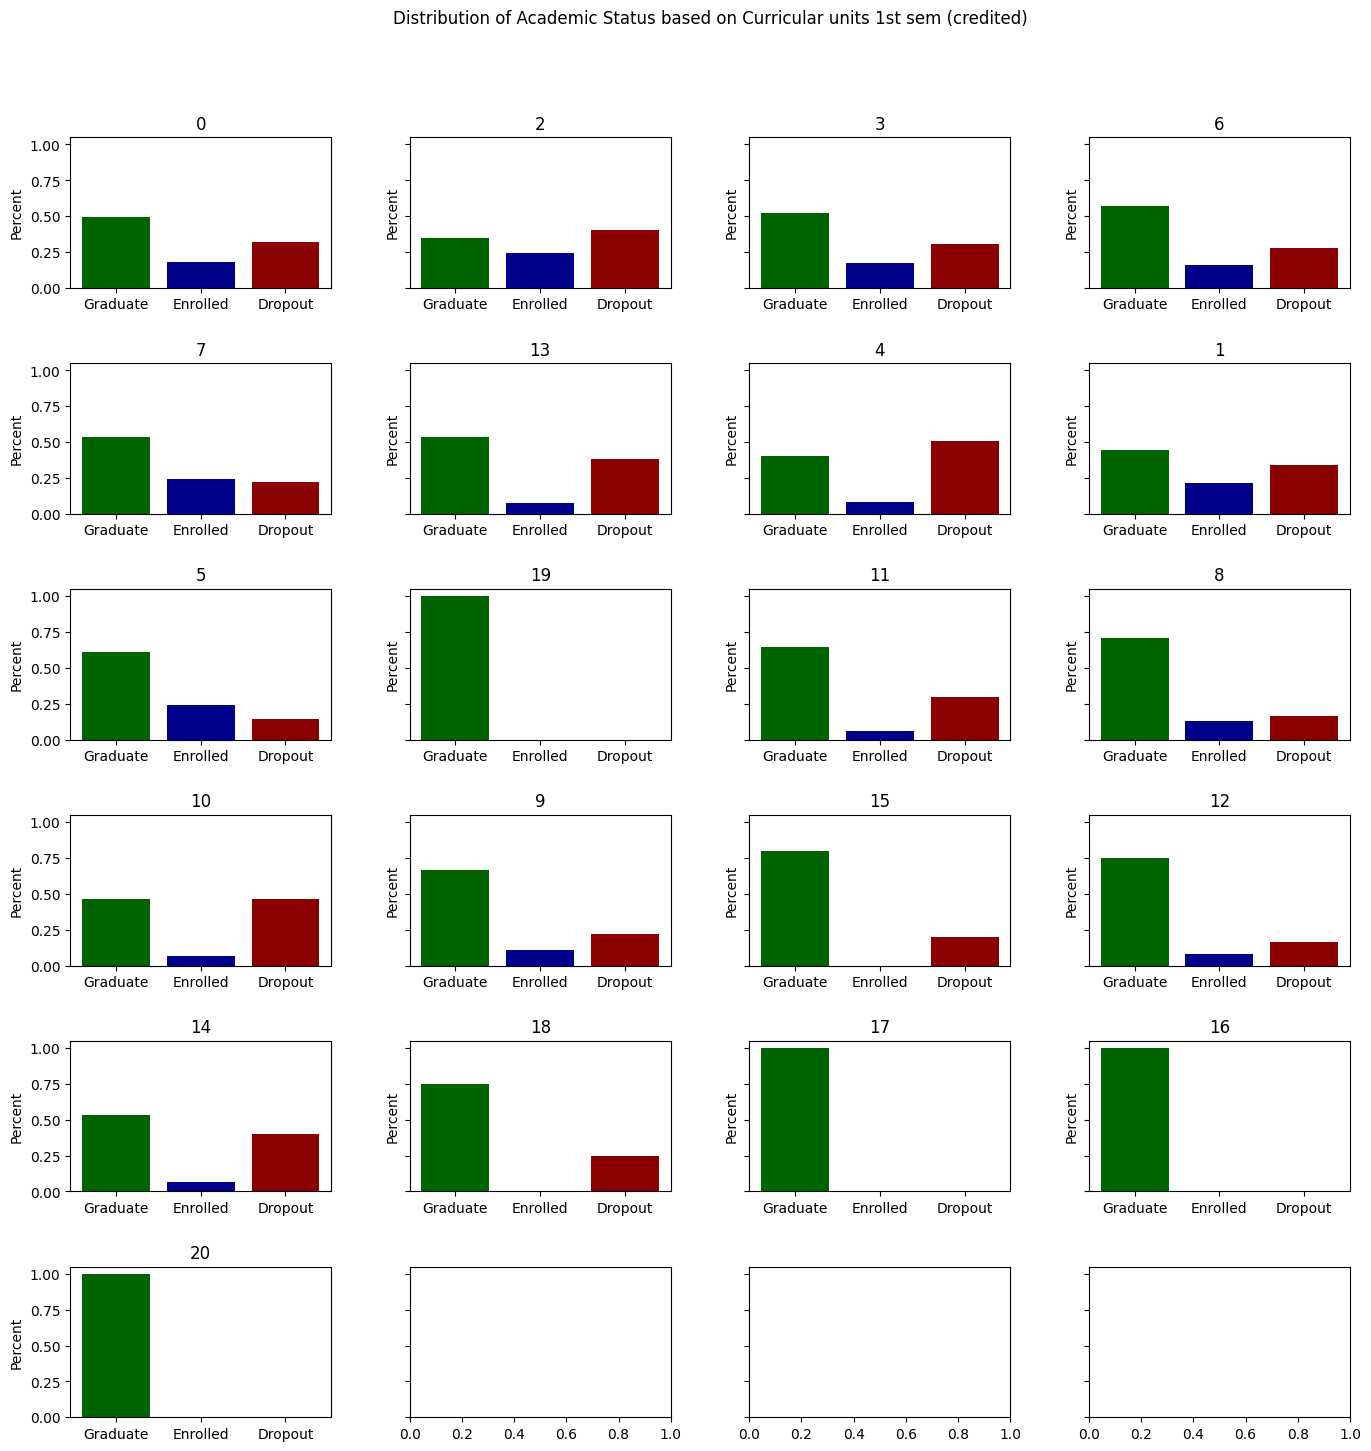

In [41]:
# select subset of dataset
col = df.columns[21]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 22: Curricular units 1st sem (enrolled)

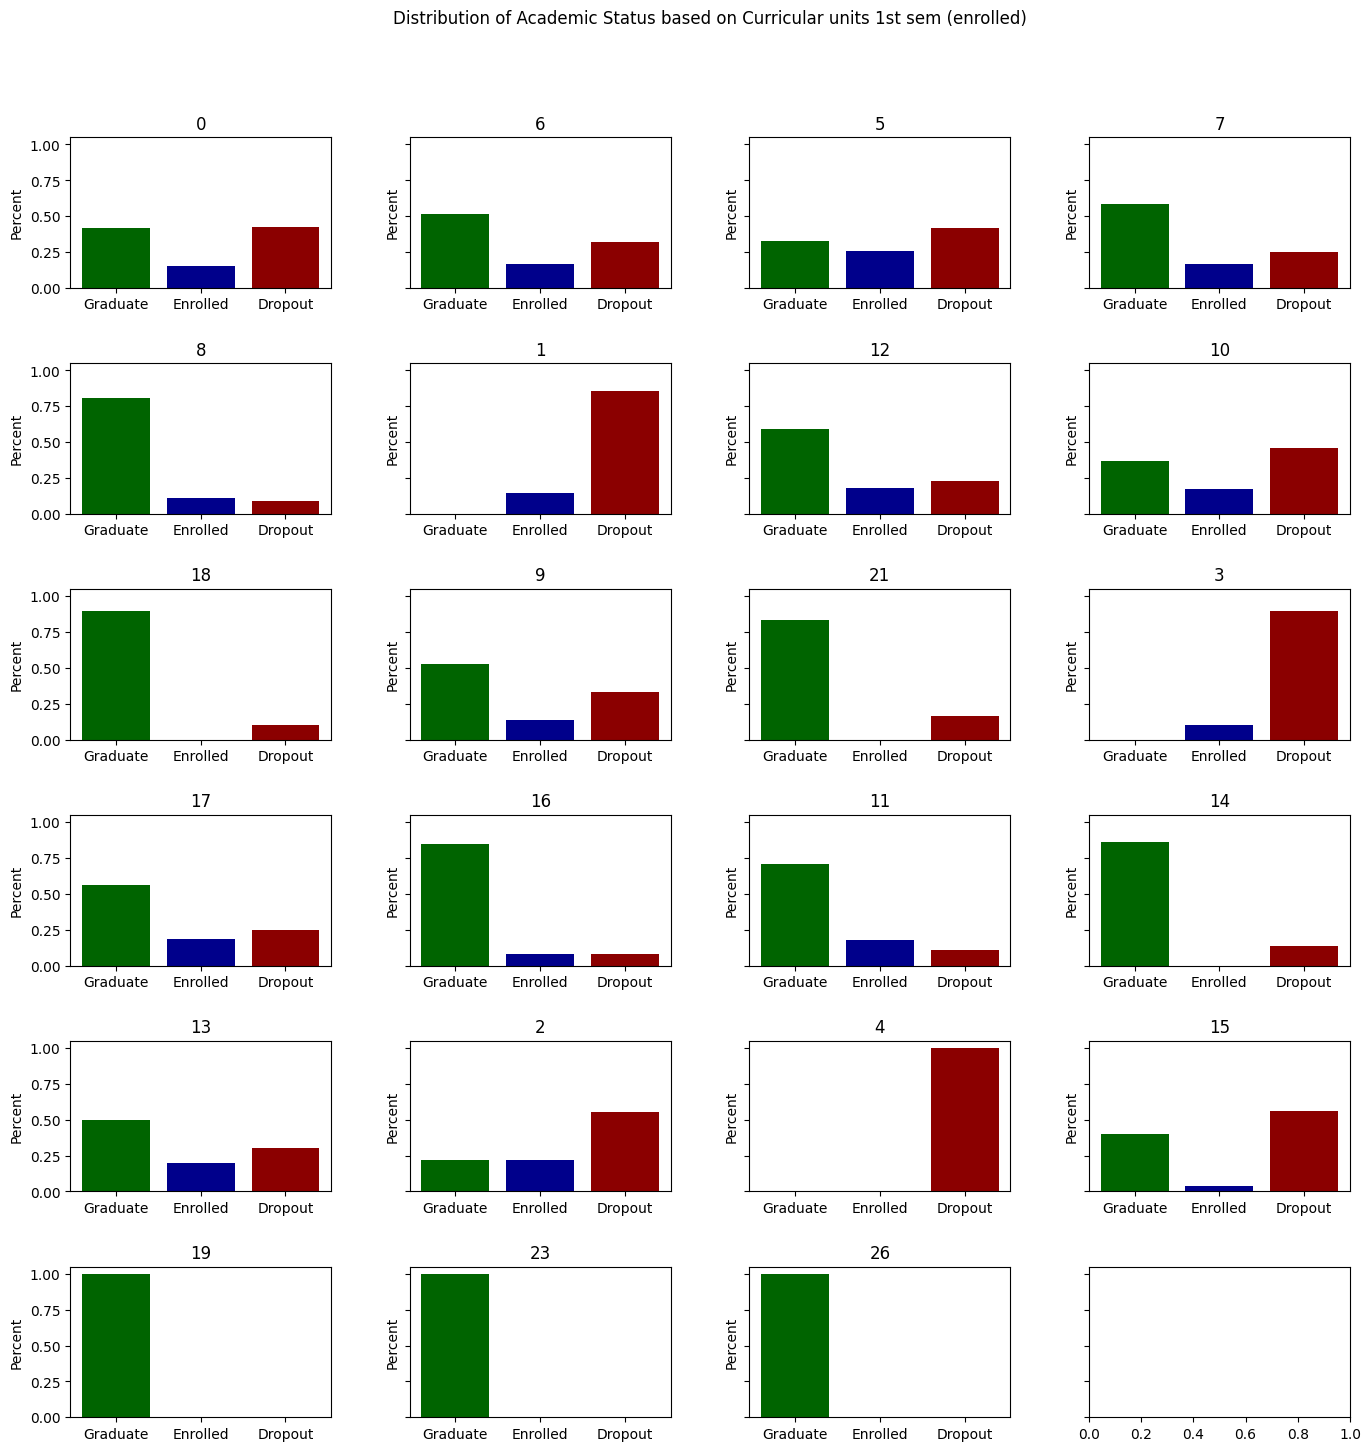

In [43]:
# select subset of dataset
col = df.columns[22]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 23: Curricular units 1st sem (evaluations)

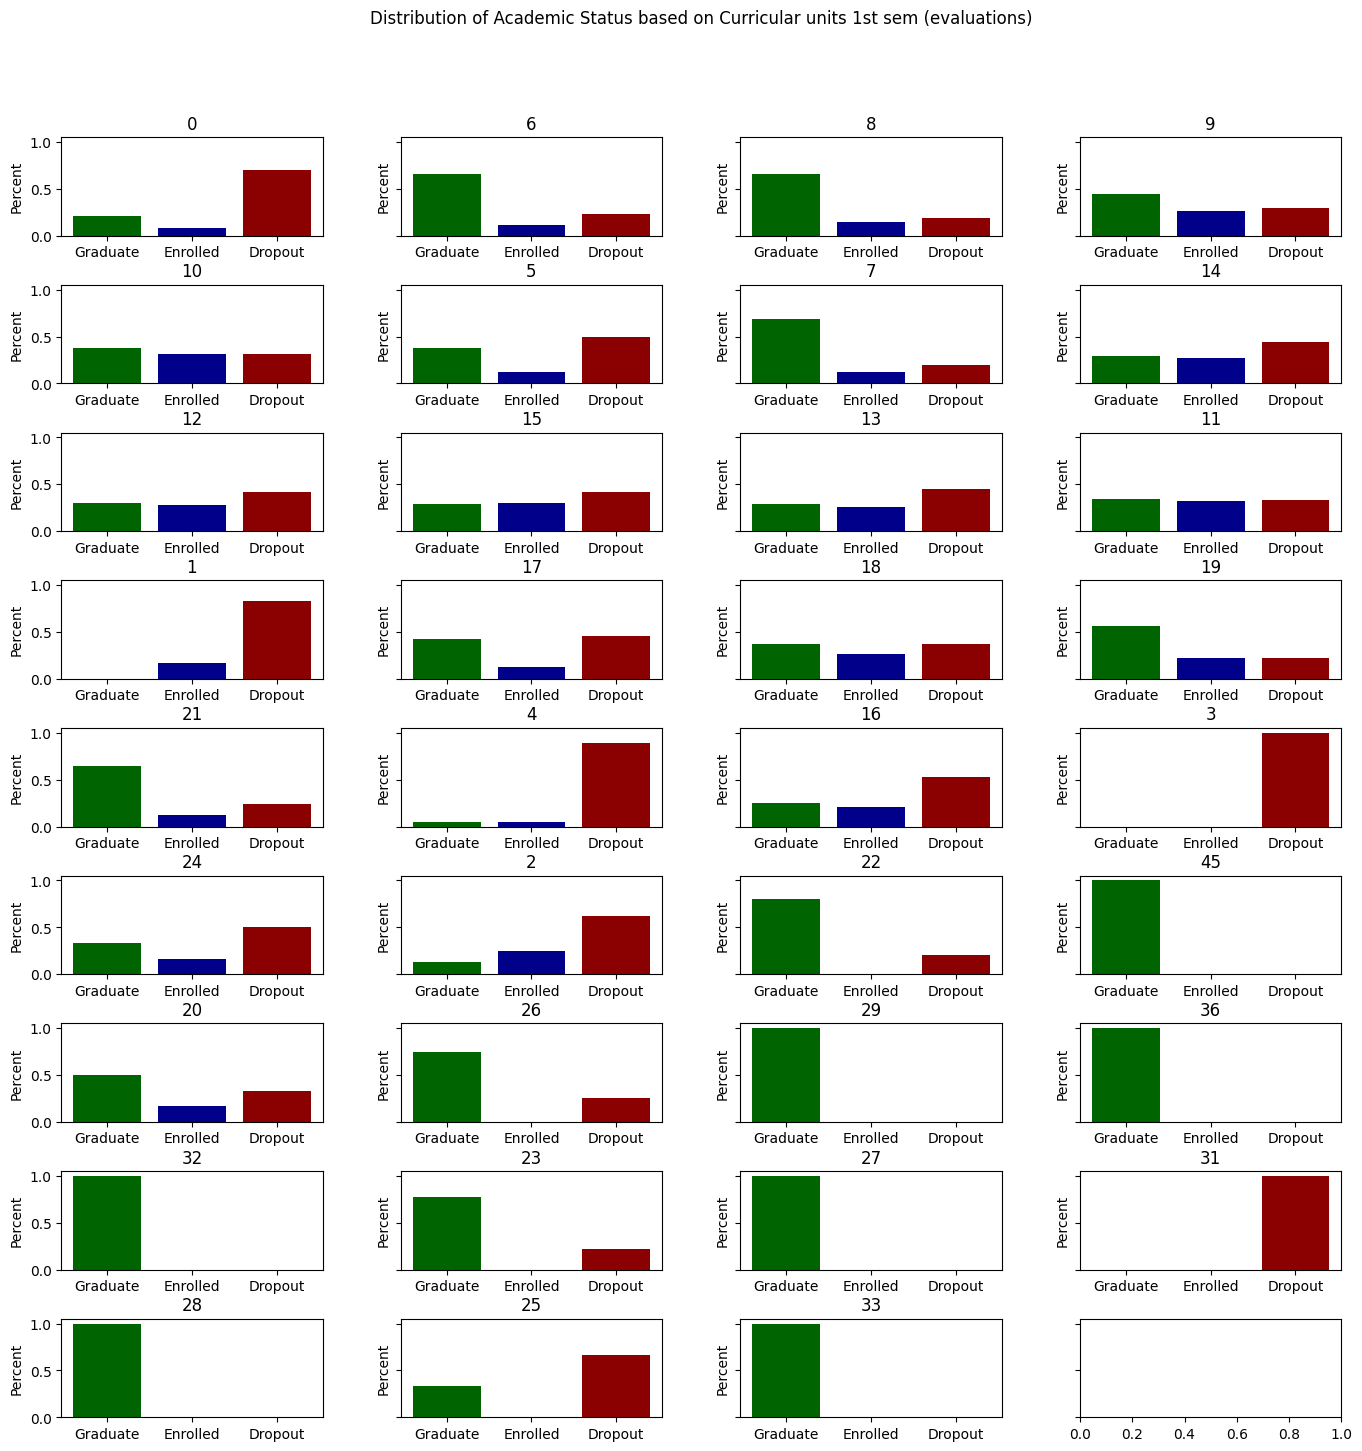

In [44]:
# select subset of dataset
col = df.columns[23]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 9
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 24: Curricular units 1st sem (approved)

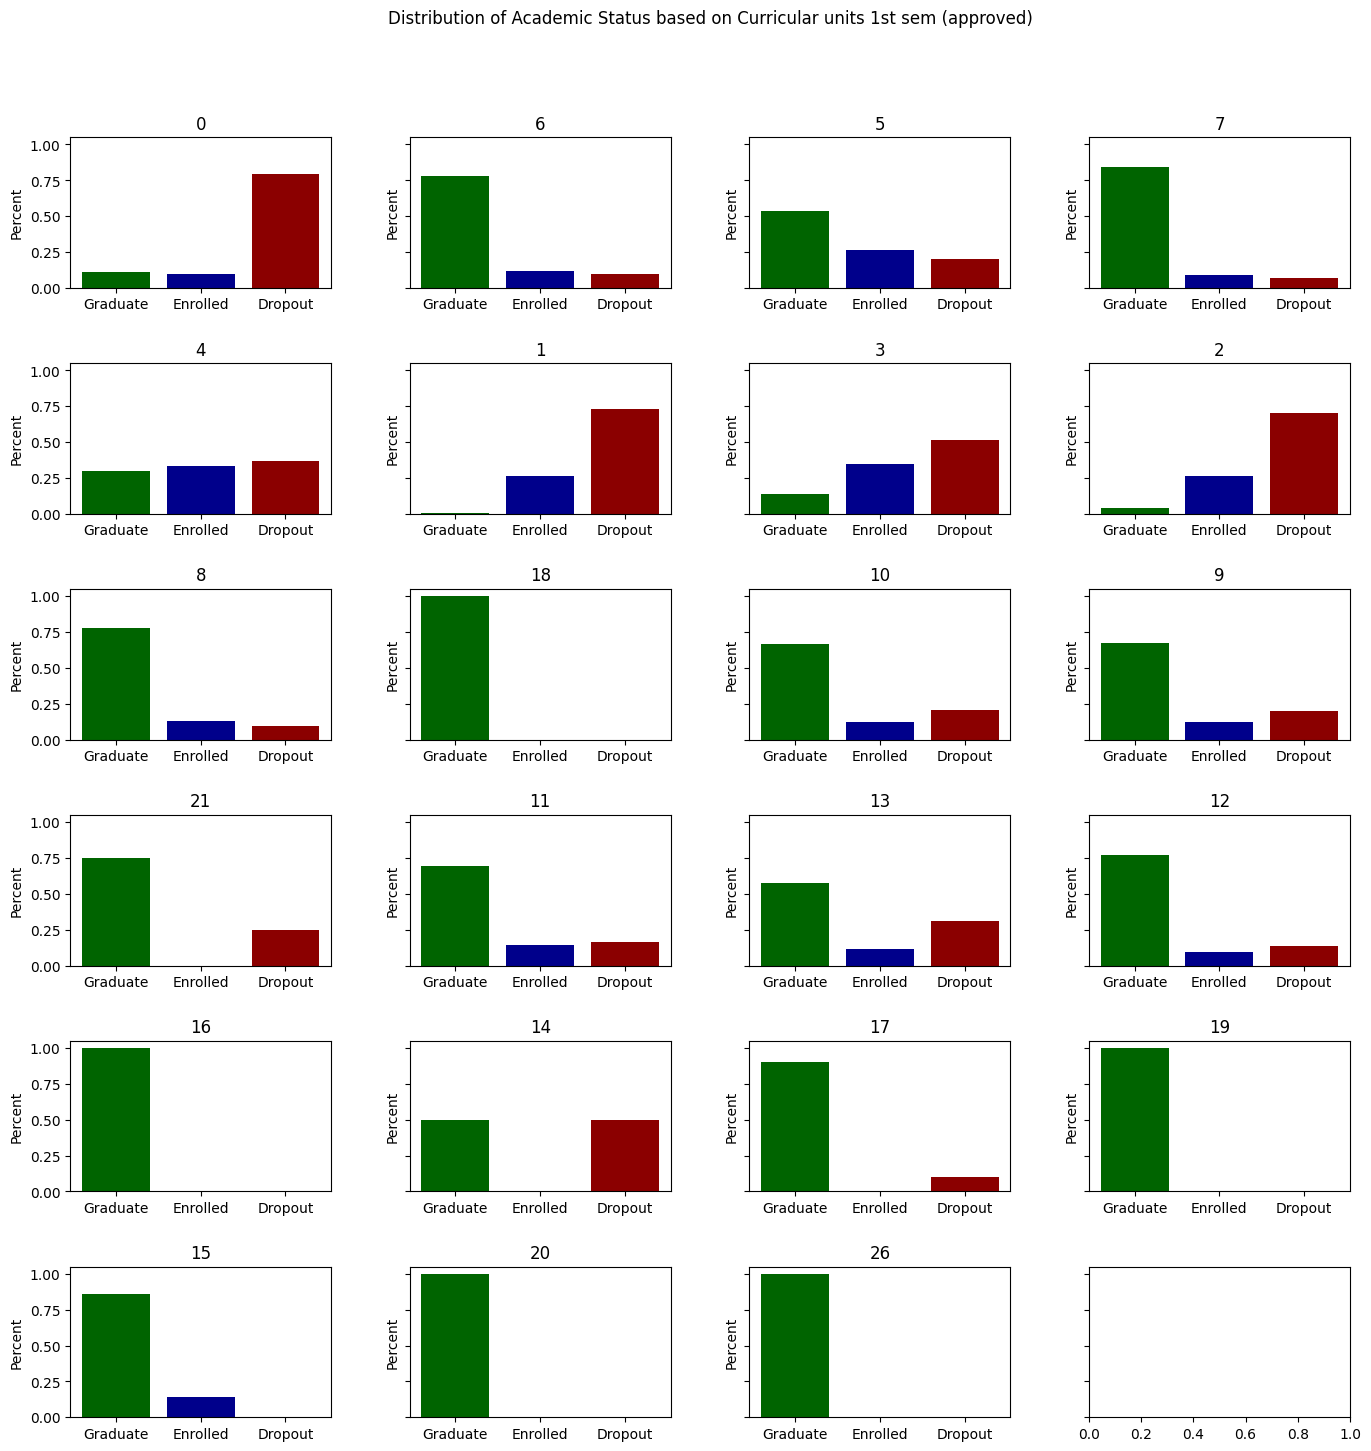

In [45]:
# select subset of dataset
col = df.columns[24]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 25: Curricular units 1st sem (grade)

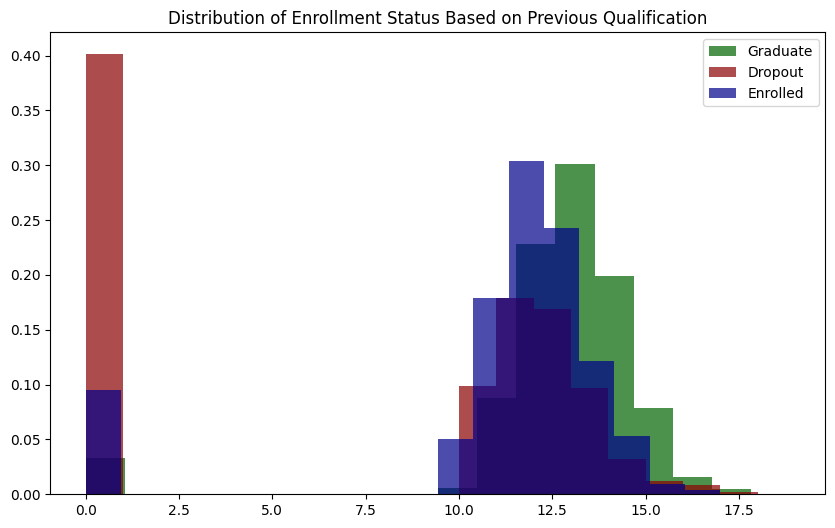

In [46]:
col = df.columns[25]

plt.figure(figsize=(10,6))
feature_ser = df[col]
for target_val in ['Graduate', 'Dropout', 'Enrolled']:
    plt.hist(feature_ser[df['Target'] == target_val], color=colors[target_val], alpha=.7, bins=18, label=target_val, density=True)
plt.title('Distribution of Enrollment Status Based on Previous Qualification')
plt.legend()
plt.show()

### Columns 26: Curricular units 1st sem (without evaluations)

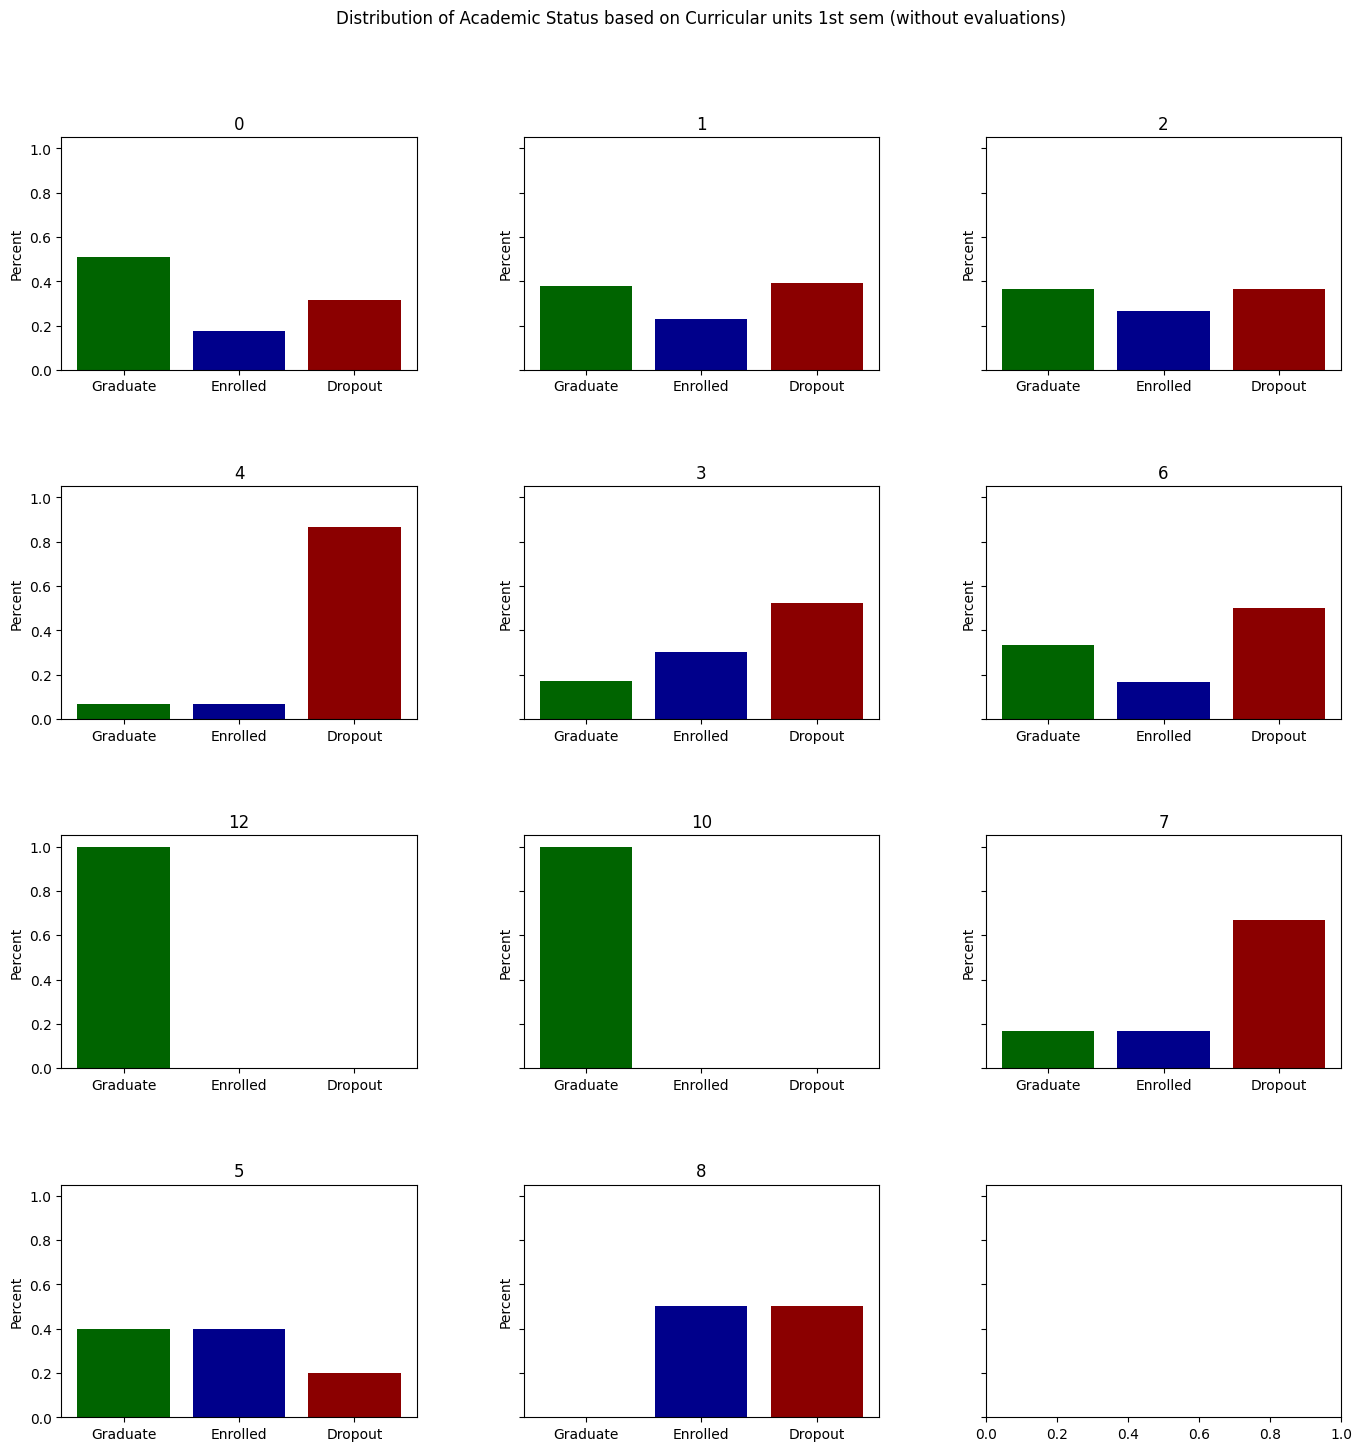

In [48]:
# select subset of dataset
col = df.columns[26]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 4
subplots_width = 3
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 27: Curricular units 2nd sem (credited)

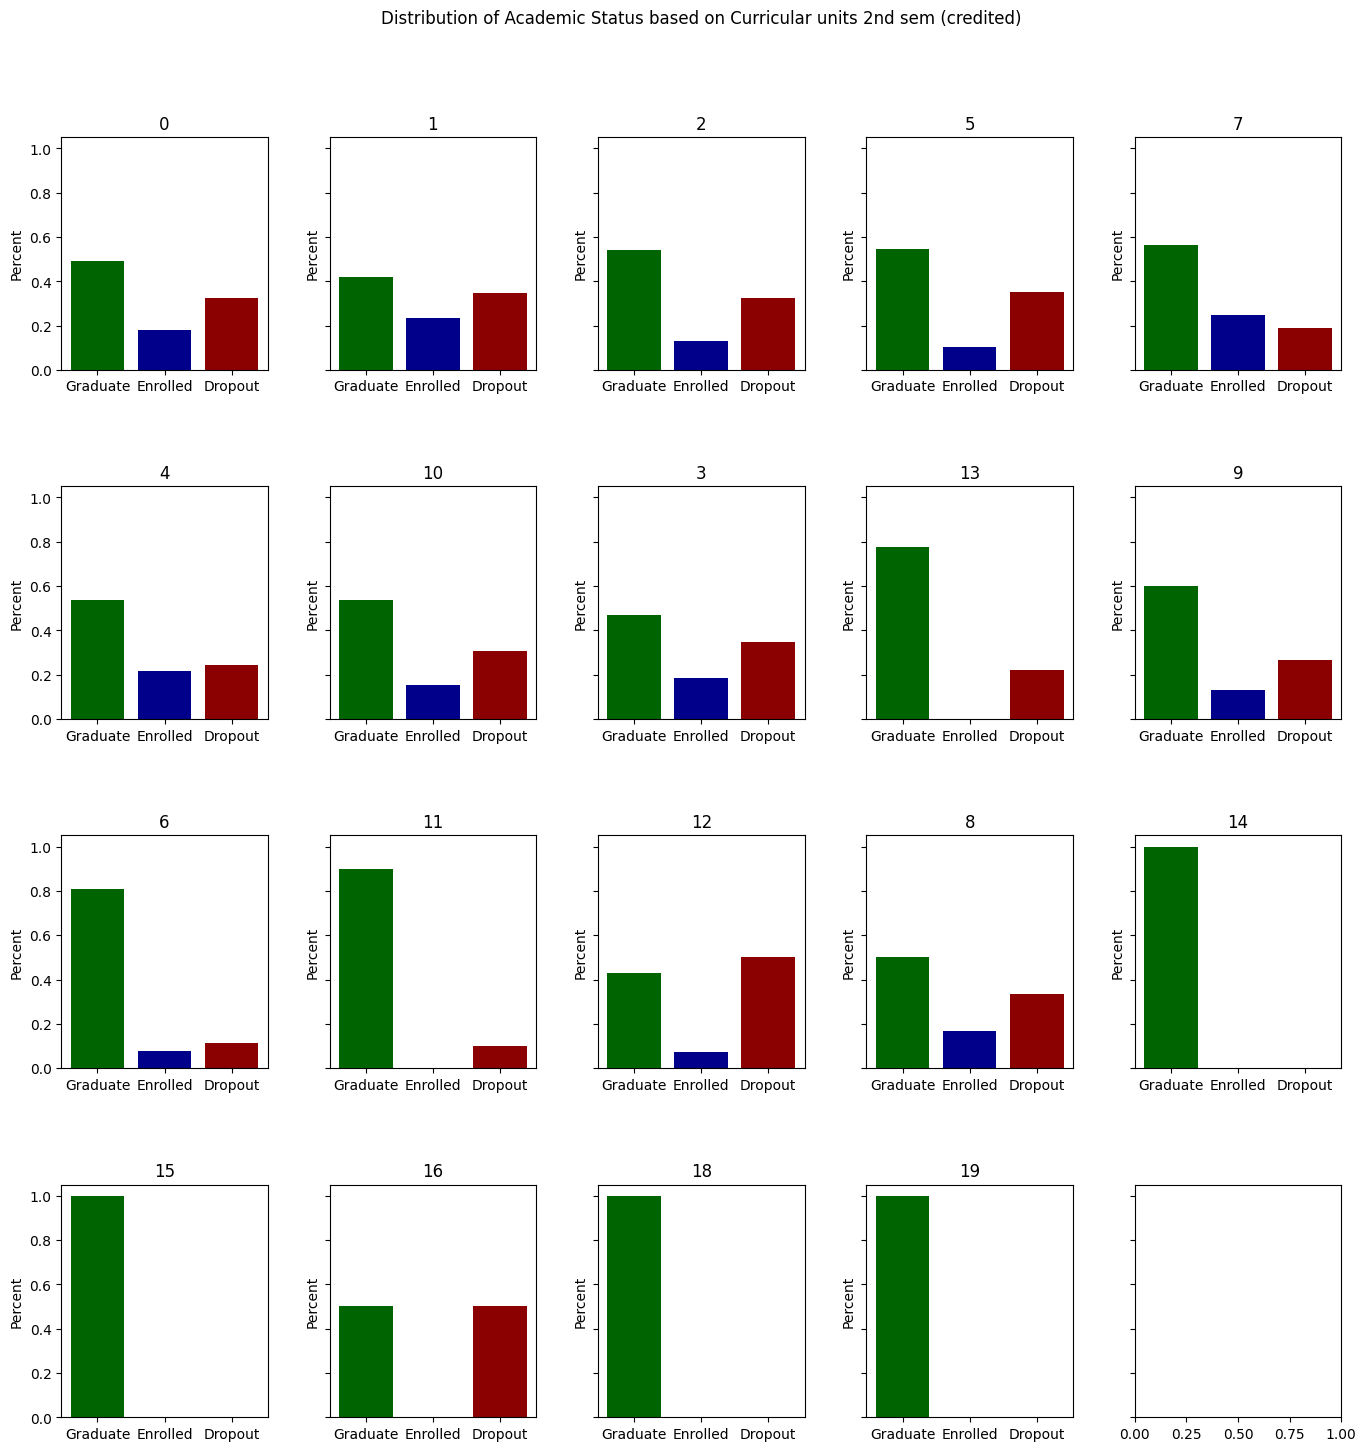

In [49]:
# select subset of dataset
col = df.columns[27]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 4
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 28: Curricular units 2nd sem (enrolled)

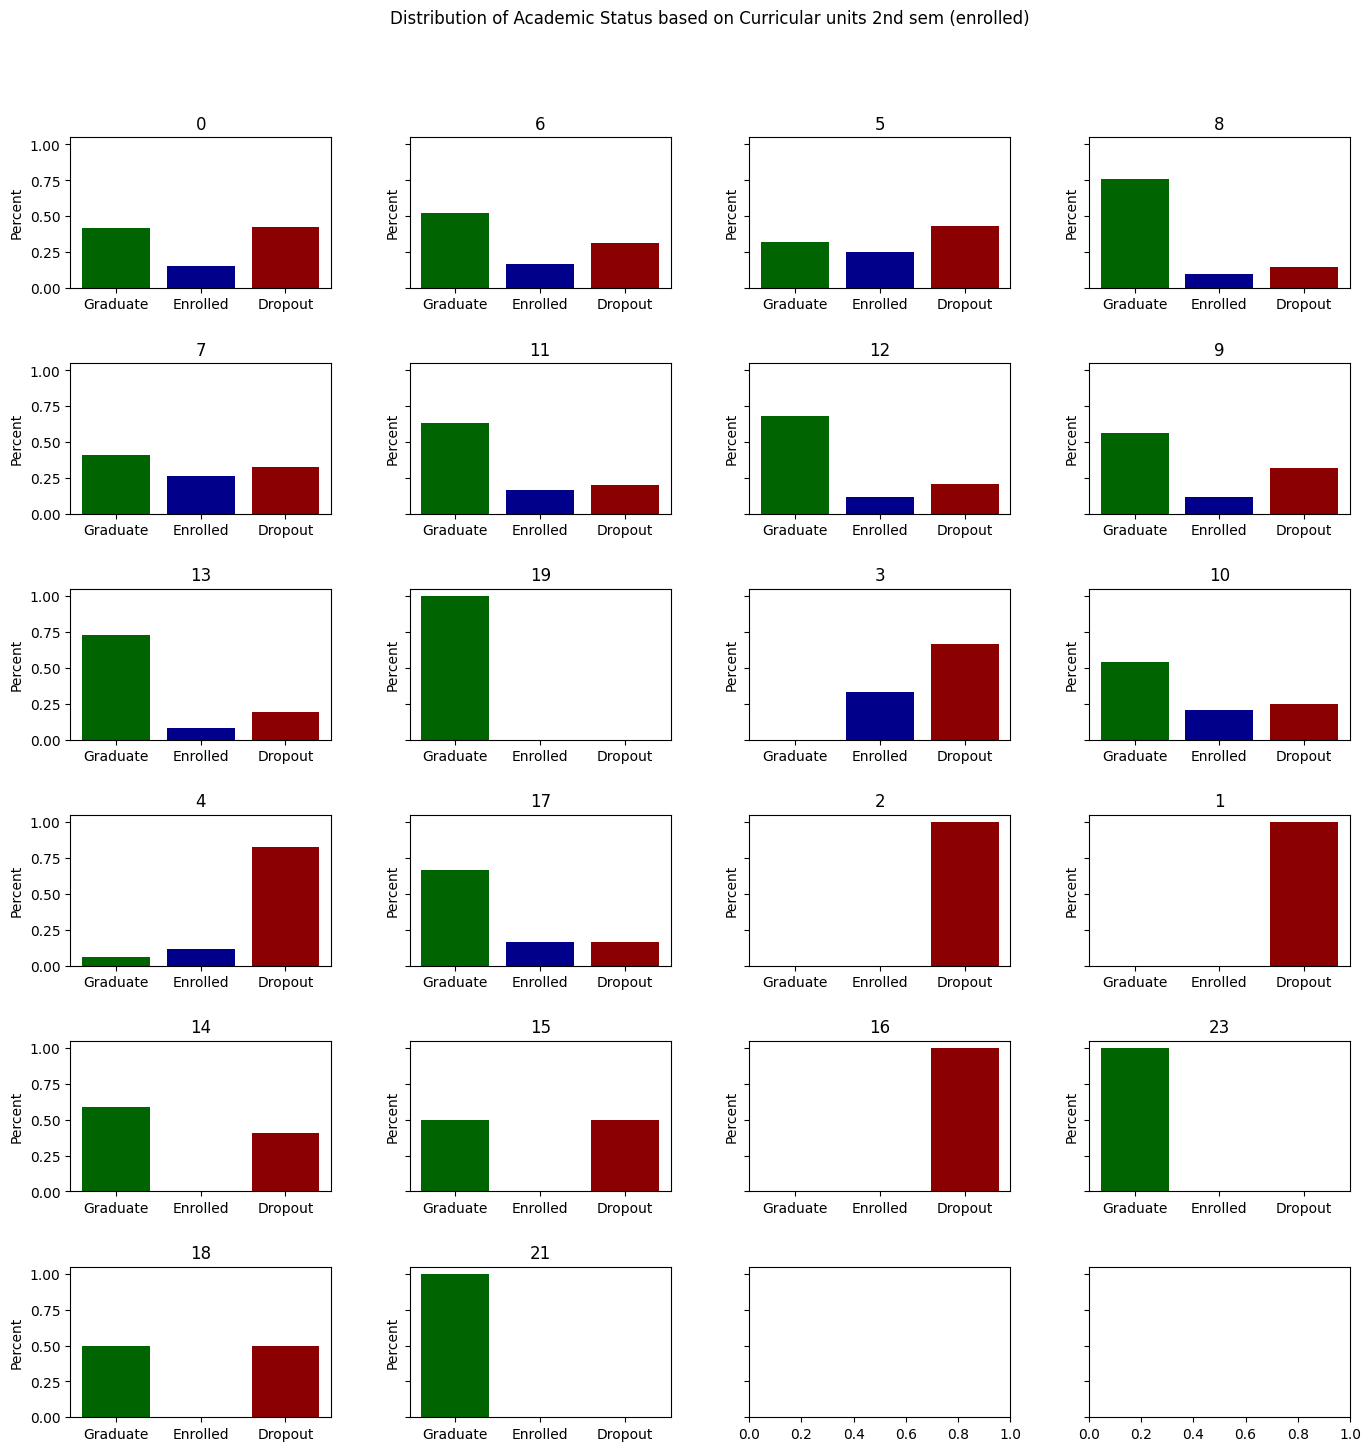

In [54]:
# select subset of dataset
col = df.columns[28]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 4
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 29: Curricular units 2nd sem (evaluations)

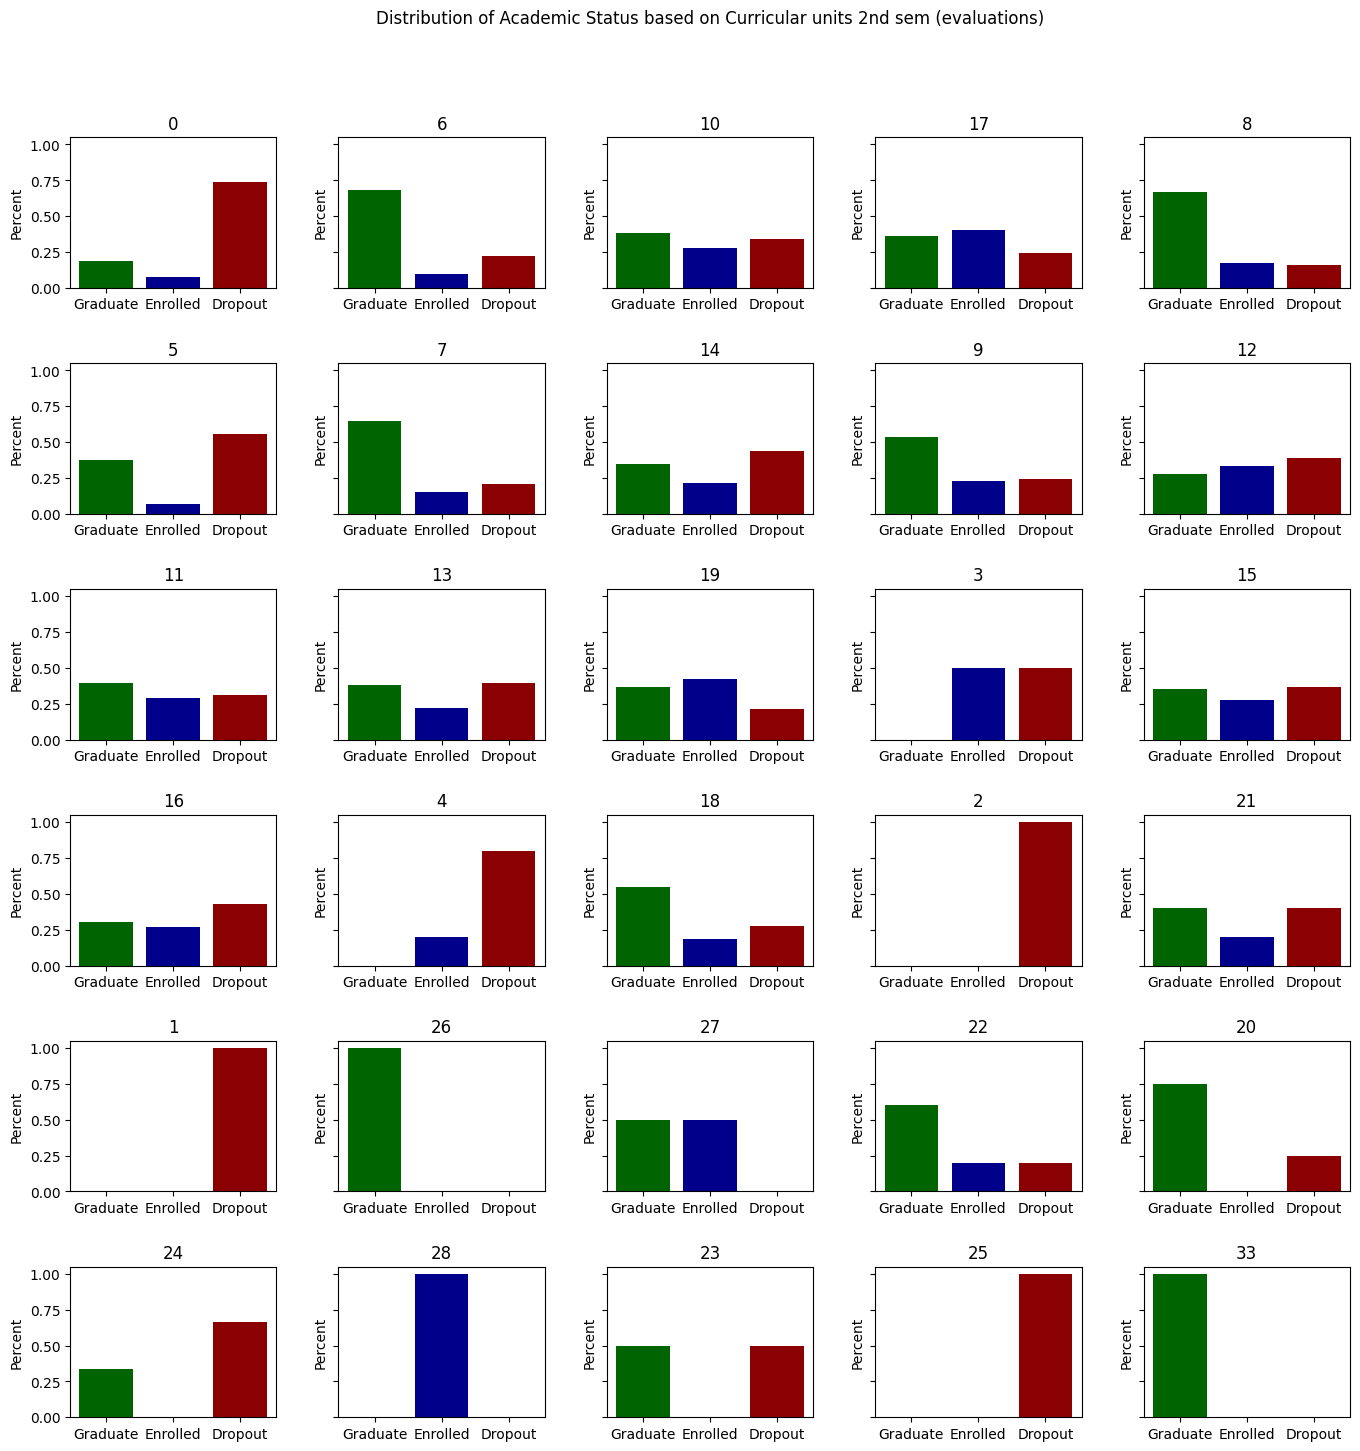

In [52]:
# select subset of dataset
col = df.columns[29]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 6
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 30: Curricular units 2nd sem (approved)

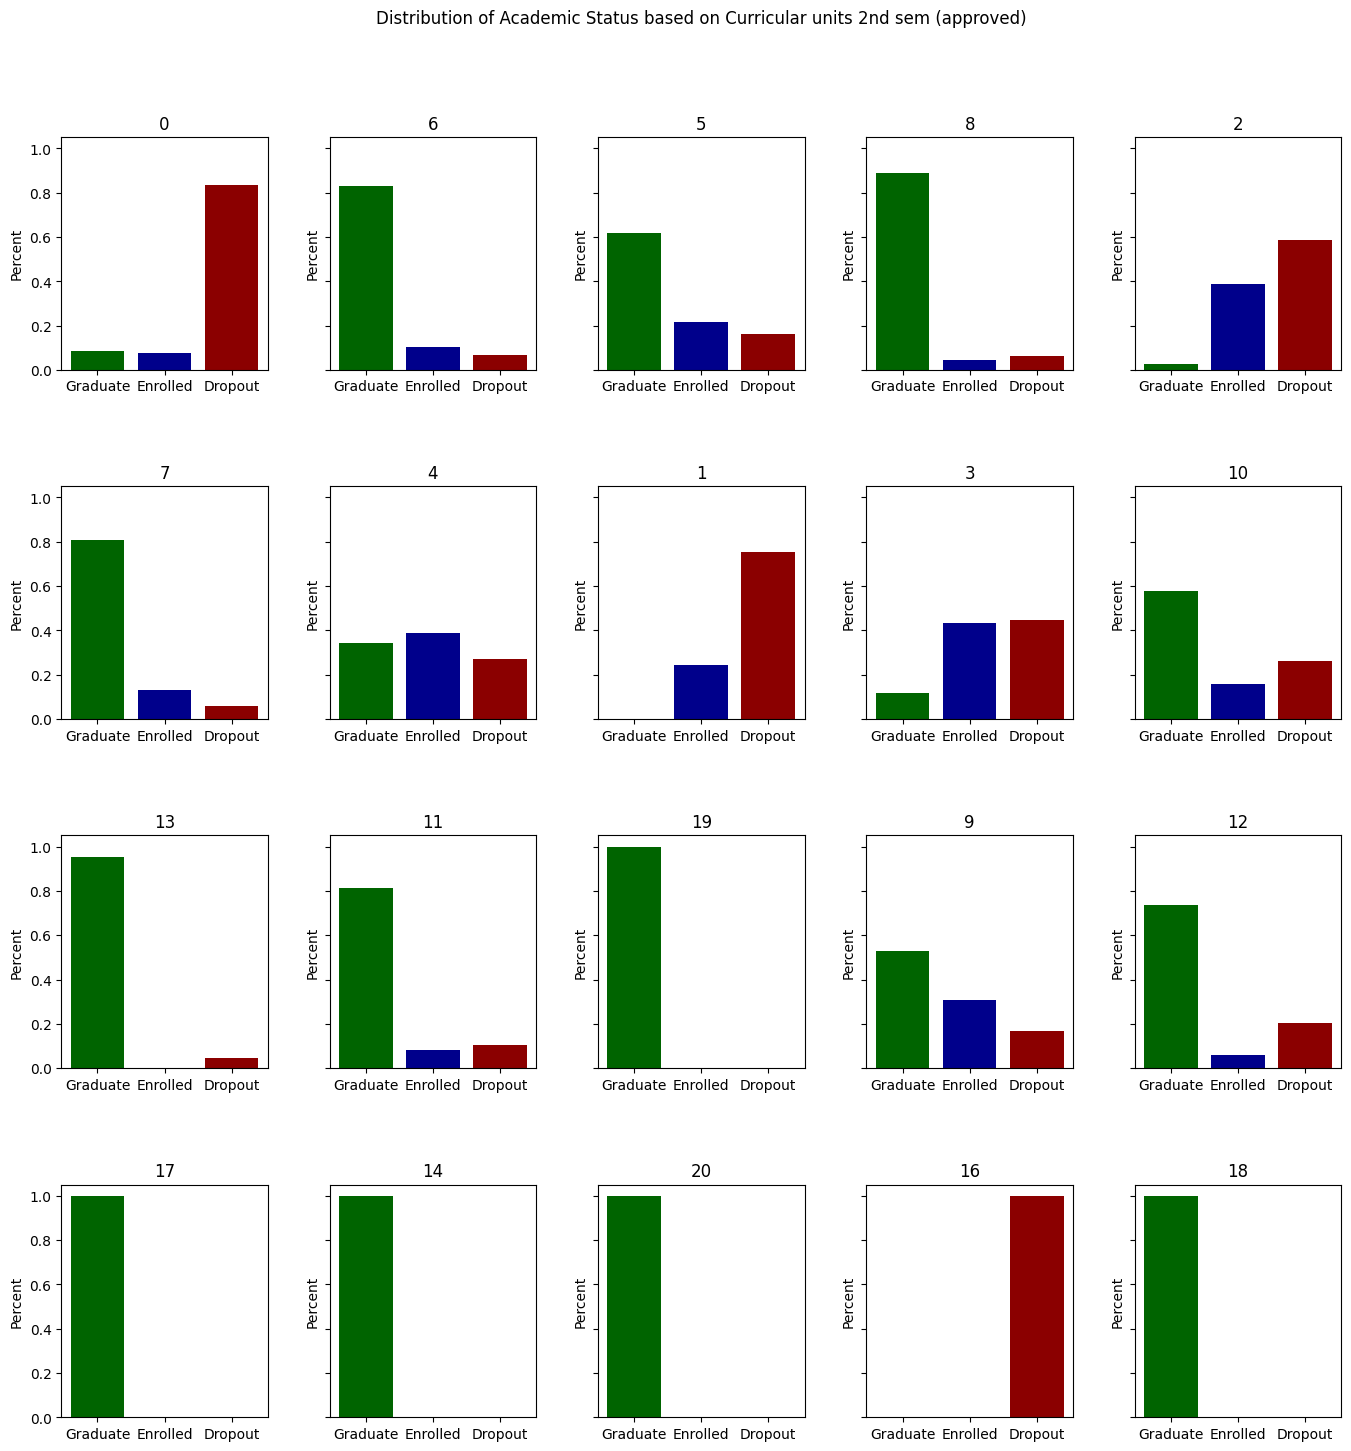

In [56]:
# select subset of dataset
col = df.columns[30]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 4
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 31: Curricular units 2nd sem (grade)

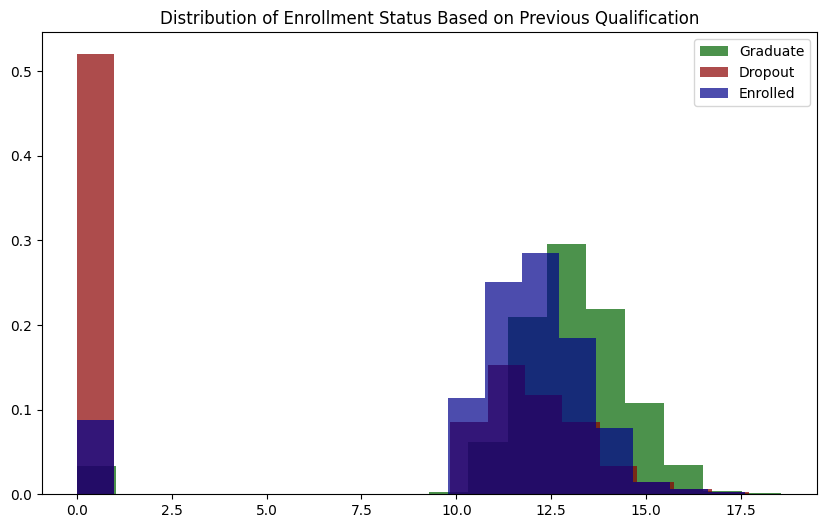

In [57]:
col = df.columns[31]

plt.figure(figsize=(10,6))
feature_ser = df[col]
for target_val in ['Graduate', 'Dropout', 'Enrolled']:
    plt.hist(feature_ser[df['Target'] == target_val], color=colors[target_val], alpha=.7, bins=18, label=target_val, density=True)
plt.title('Distribution of Enrollment Status Based on Previous Qualification')
plt.legend()
plt.show()

### Columns 32: Curricular units 2nd sem (without evaluations)

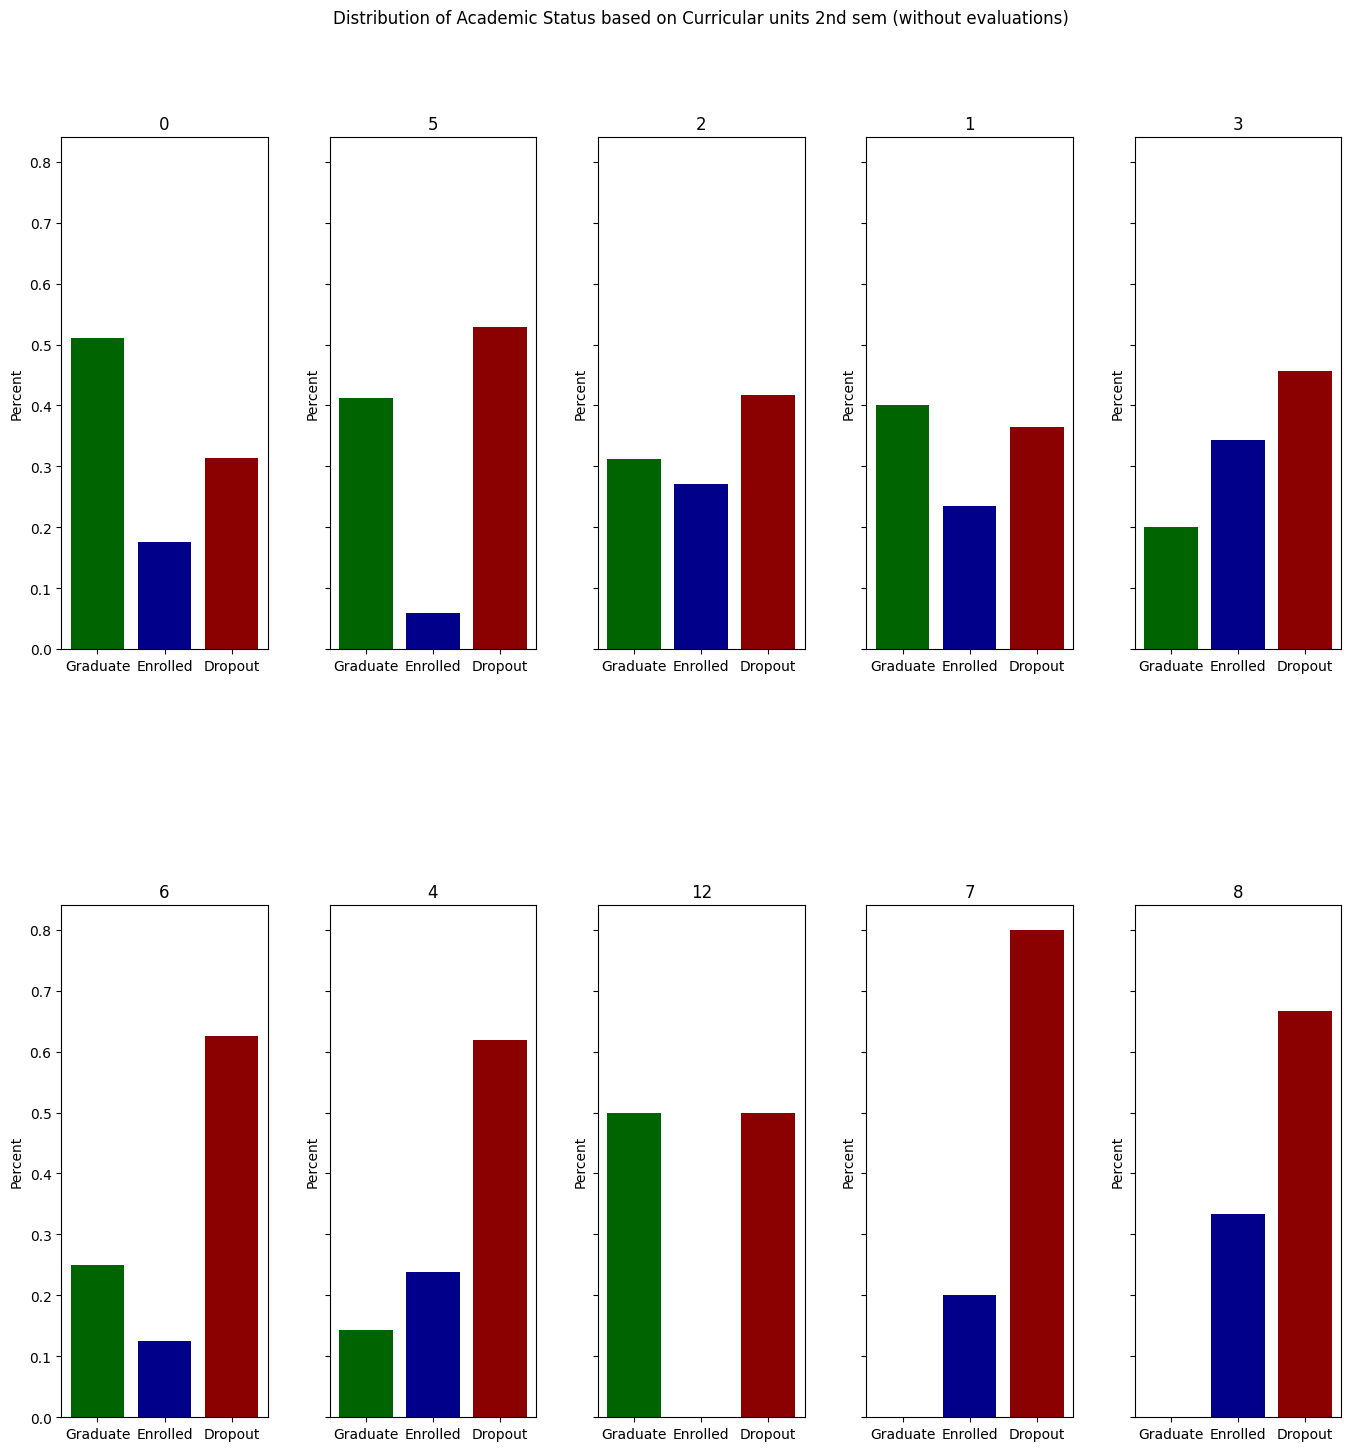

In [58]:
# select subset of dataset
col = df.columns[32]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 33: Unemployment rate

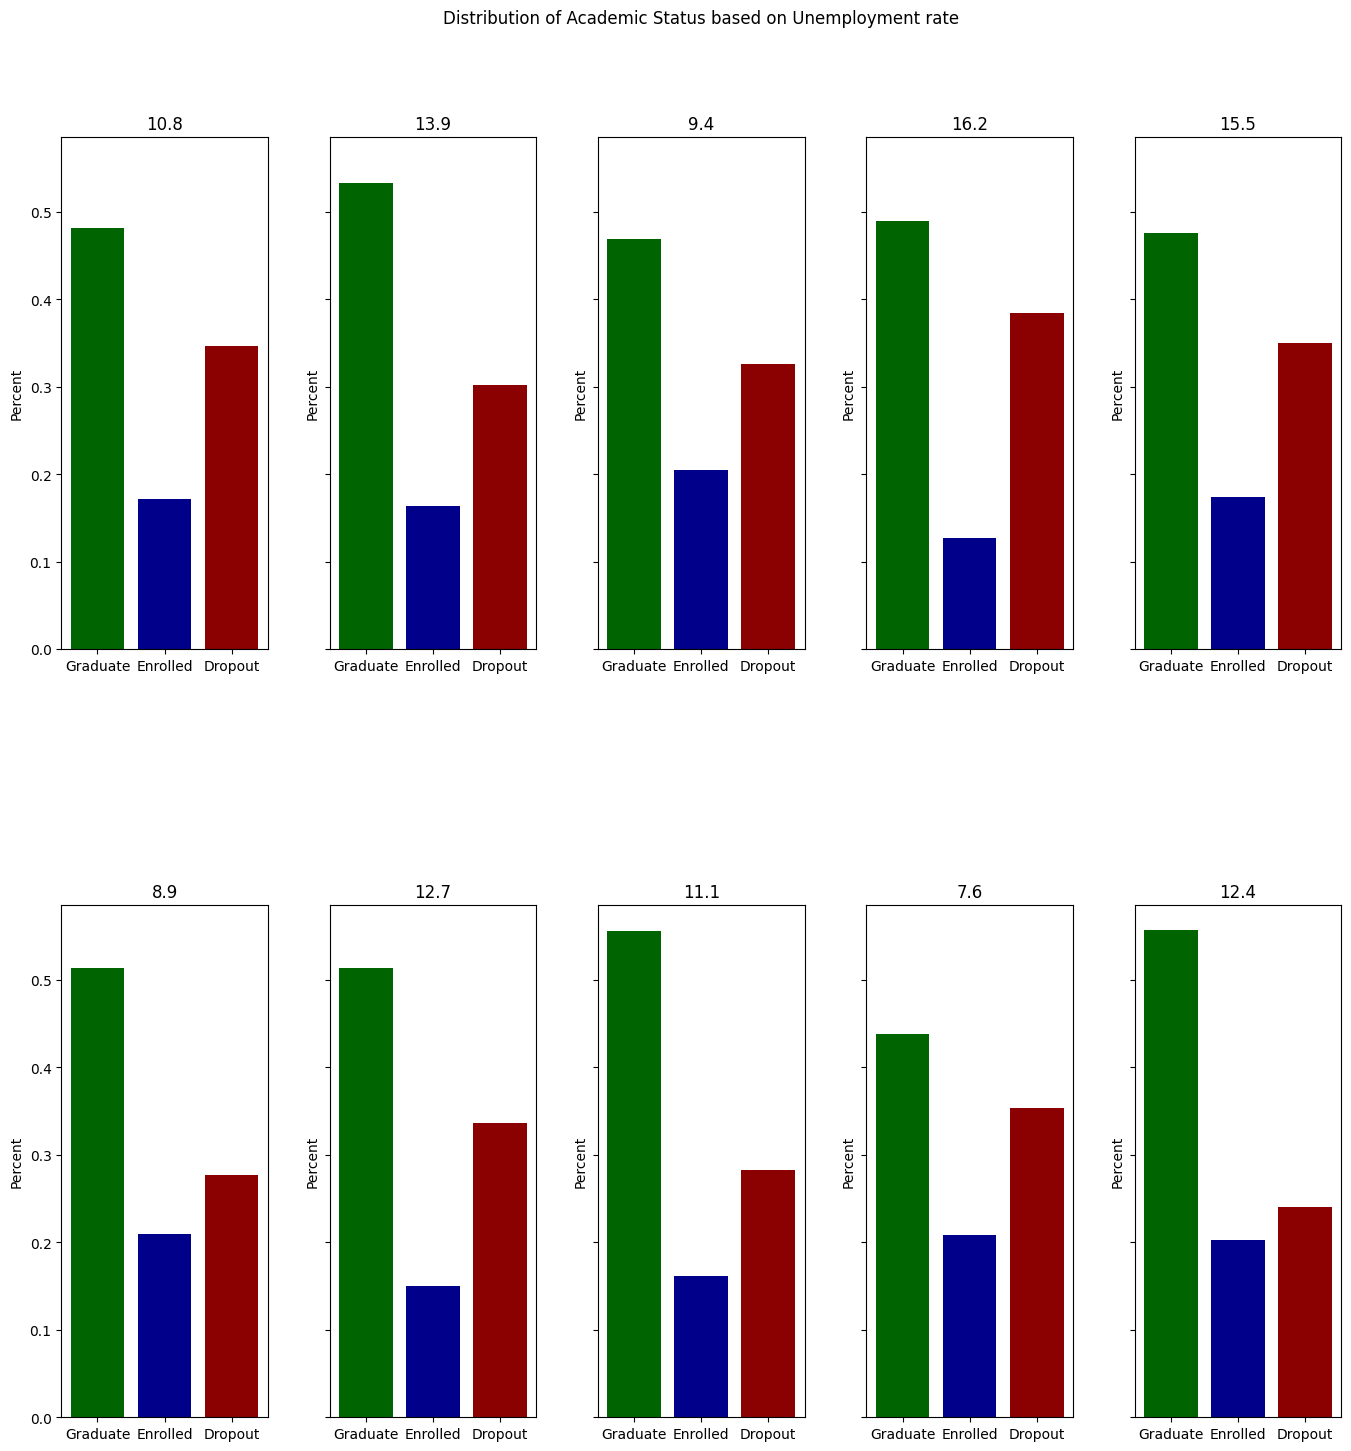

In [59]:
# select subset of dataset
col = df.columns[33]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 34: Inflation rate

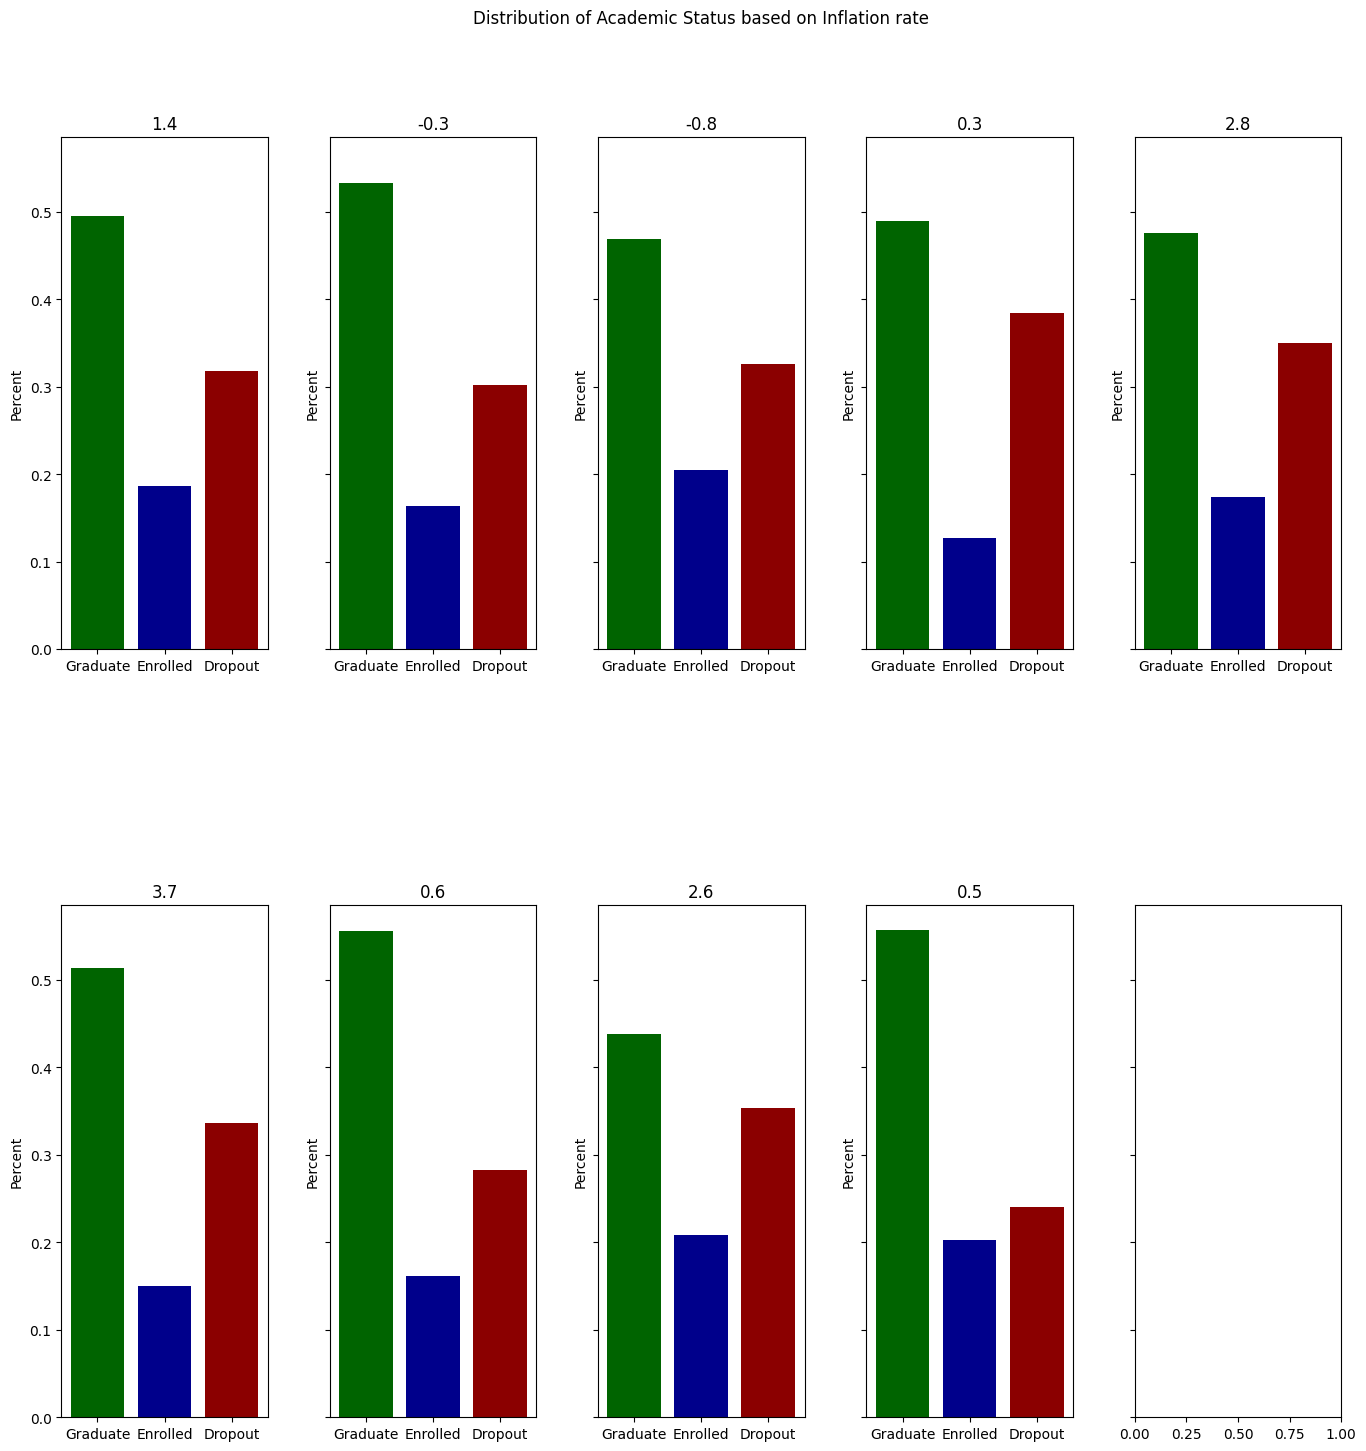

In [60]:
# select subset of dataset
col = df.columns[34]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()

### Columns 35: GDP

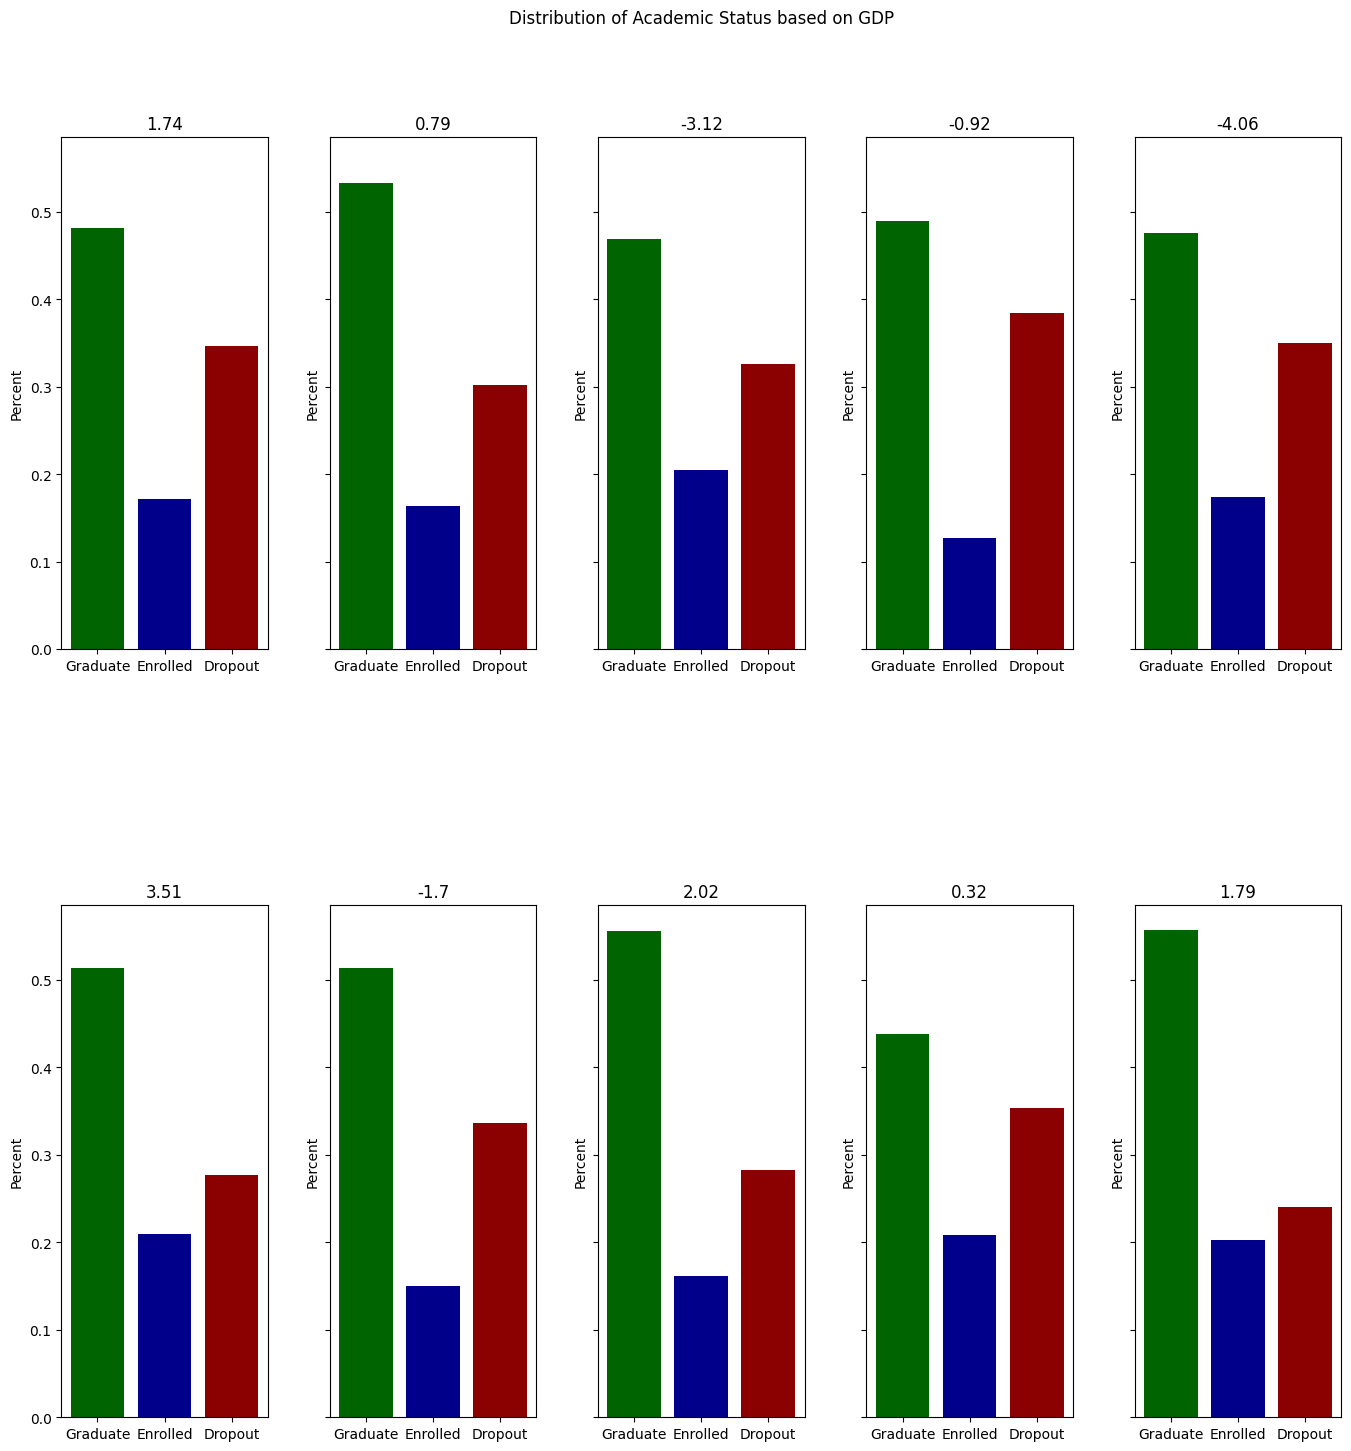

In [61]:
# select subset of dataset
col = df.columns[35]
# group by feature column values, find %makeup for each target val (Graduate, Dropout, Enrolled)
val_counts = df[[col, 'Target']].groupby(col).value_counts(normalize=True)

subplots_height = 2
subplots_width = 5
# create #unique_feature_val subplots (hard-coded)
fig, axs = plt.subplots(subplots_height, subplots_width, figsize=(16, 16), sharey=True)
# reshape to make more readable
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

# generate a bar chart for each group; group for each unique value within feature column
feature_vals = df[col].unique()
for i in range(len(feature_vals)):
    for target_val in ['Graduate', 'Enrolled', 'Dropout']:
        # create bar within barchart
        # extract value to map (may be 0)
        if (feature_vals[i], target_val) not in val_counts.index:
            dens = 0
        else:
            dens = val_counts.loc[(feature_vals[i], target_val)]
        axs[math.floor(i/subplots_width)][i%subplots_width].bar(target_val, dens, color=colors[target_val])
    # set title to feature value
    axs[math.floor(i/subplots_width)][i%subplots_width].set_title(feature_vals[i])
    # set y-axis title
    axs[math.floor(i/subplots_width)][i%subplots_width].set_ylabel('Percent')
fig.suptitle('Distribution of Academic Status based on ' + col)
plt.show()